In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
!mkdir -p /content/blast_project/data
!mkdir -p /content/blast_project/models
!mkdir -p /content/blast_project/notebooks
%cd /content/blast_project

/content/blast_project


In [ ]:
!apt-get update -qq
!apt-get install -y -qq ncbi-blast+
!pip install -q biopython scikit-learn pandas matplotlib seqeval umap-learn hdbscan lightgbm

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package ncbi-data.
(Reading database ... 126371 files and directories currently installed.)
Preparing to unpack .../ncbi-data_6.1.20170106+dfsg1-9_all.deb ...
Unpacking ncbi-data (6.1.20170106+dfsg1-9) ...
Selecting previously unselected package ncbi-blast+.
Preparing to unpack .../ncbi-blast+_2.12.0+ds-3build1_amd64.deb ...
Unpacking ncbi-blast+ (2.12.0+ds-3build1) ...
Setting up ncbi-data (6.1.20170106+dfsg1-9) ...
Setting up ncbi-blast+ (2.12.0+ds-3build1) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for hicolor-icon-theme (0.17-2) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 52.2 MB/s eta 0:00:00


In [ ]:
!curl -s https://ftp.ncbi.nlm.nih.gov/blast/db/ | sed -n '1,120p'

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>Index of /blast/db</title>
 </head>
 <body>
<h1>Index of /blast/db</h1>
<pre>Name                                       Last modified      Size  <hr><a href="/blast/">Parent Directory</a>                                                -   
<a href="FASTA/">FASTA/</a>                                     2024-02-08 10:57    -   
<a href="cloud/">cloud/</a>                                     2020-02-11 16:27    -   
<a href="experimental/">experimental/</a>                              2025-06-23 17:32    -   
<a href="v4/">v4/</a>                                        2020-06-30 10:29    -   
<a href="v5/">v5/</a>                                        2025-08-30 23:22    -   
<a href="16S_ribosomal_RNA-nucl-metadata.json">16S_ribosomal_RNA-nucl-metadata.json</a>       2025-08-26 05:36  468   
<a href="16S_ribosomal_RNA.tar.gz">16S_ribosomal_RNA.tar.gz</a>                   2025-08-26 05:36   64M  
<a href=

In [ ]:
%cd /content/blast_project/data
!wget -c https://ftp.ncbi.nlm.nih.gov/blast/db/18S_fungal_sequences.tar.gz
!wget -c https://ftp.ncbi.nlm.nih.gov/blast/db/18S_fungal_sequences-nucl-metadata.json
!tar -tvf 18S_fungal_sequences.tar.gz | sed -n '1,200p'

/content/blast_project/data
--2025-08-31 18:30:11--  https://ftp.ncbi.nlm.nih.gov/blast/db/18S_fungal_sequences.tar.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.12, 130.14.250.13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61099487 (58M) [application/x-gzip]
Saving to: ‘18S_fungal_sequences.tar.gz’

18S_fungal_sequence 100%[===================>]  58.27M  27.3MB/s    in 2.1s    

2025-08-31 18:30:14 (27.3 MB/s) - ‘18S_fungal_sequences.tar.gz’ saved [61099487/61099487]

--2025-08-31 18:30:14--  https://ftp.ncbi.nlm.nih.gov/blast/db/18S_fungal_sequences-nucl-metadata.json
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.12, 130.14.250.13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 489 [application/json]
S

In [ ]:
!tar -xzf 18S_fungal_sequences.tar.gz
!ls -lh
!find . -maxdepth 2 -type f | sed -n '1,120p'

total 324M
-rw-rw-r-- 1 9011  990 224K Aug 28 09:36 18S_fungal_sequences.ndb
-rw-rw-r-- 1 9011  990 628K Aug 28 09:36 18S_fungal_sequences.nhr
-rw-rw-r-- 1 9011  990  44K Aug 28 09:36 18S_fungal_sequences.nin
-rw-rw-r-- 1 9011  990  30K Aug 28 09:36 18S_fungal_sequences.nnd
-rw-rw-r-- 1 9011  990  164 Aug 28 09:36 18S_fungal_sequences.nni
-rw-rw-r-- 1 9011  990  15K Aug 28 09:36 18S_fungal_sequences.nog
-rw-rw-r-- 1 9011  990  74K Aug 28 09:36 18S_fungal_sequences.nos
-rw-rw-r-- 1 9011  990  44K Aug 28 09:36 18S_fungal_sequences.not
-rw-rw-r-- 1 9011  990 1.2M Aug 28 09:36 18S_fungal_sequences.nsq
-rw-rw-r-- 1 9011  990 140K Aug 28 09:36 18S_fungal_sequences.ntf
-rw-rw-r-- 1 9011  990  30K Aug 28 09:36 18S_fungal_sequences.nto
-rw-r--r-- 1 root root  489 Aug 28 09:36 18S_fungal_sequences-nucl-metadata.json
-rw-r--r-- 1 root root  59M Aug 28 09:36 18S_fungal_sequences.tar.gz
-rw-rw-r-- 1 9011  990 164M Aug 28 09:36 taxdb.btd
-rw-rw-r-- 1 9011  990  18M Aug 28 09:36 taxdb.bti
-rw-rw-r-- 

In [ ]:
!blastdbcmd -db ./18S_fungal_sequences -entry all -outfmt '%a %t' -out 18S_fungal_sequences_all.fasta
!blastdbcmd -db ./18S_fungal_sequences -entry all -out 18S_fungal_sequences_all.fasta

In [ ]:
import os, json
from Bio import SeqIO
data_dir = '/content/blast_project/data'
os.listdir(data_dir)[:40]
fasta_files = [f for f in os.listdir(data_dir) if f.lower().endswith(('.fa','.fasta','.fna','.ffn','.faa','.seq'))]
print("FASTA files found:", fasta_files)
if fasta_files:
    sample_fa = os.path.join(data_dir, fasta_files[0])
    print("Inspecting", sample_fa)
    count = 0
    for rec in SeqIO.parse(sample_fa, 'fasta'):
        print(">", rec.id, "len=", len(rec.seq))
        print(str(rec.seq)[:120]+"...")
        count += 1
        if count >= 3:
            break

md_path = os.path.join(data_dir, '18S_fungal_sequences-nucl-metadata.json')
if os.path.exists(md_path):
    with open(md_path) as f:
        md = json.load(f)
    print("Metadata keys:", list(md.keys())[:20])

    keys = list(md.keys())
    if keys:
        sample_key = keys[0]
        print("Sample metadata key example:", sample_key)
        print(md[sample_key] if len(str(md[sample_key])) < 500 else "too long to print")
else:
    print("No metadata JSON found in folder.")


FASTA files found: ['18S_fungal_sequences_all.fasta']
Inspecting /content/blast_project/data/18S_fungal_sequences_all.fasta
> NG_065155.1 len= 1801
TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTAAGCCATGCATGTCTAAGTATAAGCAATTTATACAGTGAAACTGCGAATGGCTCATTAAATCAGTTATCGTTTAT...
> NG_065153.1 len= 1756
ATATGCTTGTCTCAGATTAAGCCATGCATGTCTAAGTATAAGCAATTATACCGTGAAACTGCGAATGGCTCATTAAATCAGTTATCGTTTATTTGATAGTACCTTACTACTTGGATACCT...
> NG_062683.1 len= 1744
CTTGTCTCAAAGATTAAGCCATGCATGTCTAAGTATAAGCAATTTATACAGTGAAACTGCGAATGGCTCATTAAATCAGTTATCGTTTATTTGATAGTACTTAATTACTTGGATACCCGT...
Metadata keys: ['dbname', 'version', 'dbtype', 'description', 'number-of-letters', 'number-of-sequences', 'files', 'last-updated', 'bytes-total', 'bytes-to-cache', 'number-of-volumes', 'bytes-total-compressed']
Sample metadata key example: dbname
18S_fungal_sequences


In [ ]:
import random
from Bio import SeqIO
from pathlib import Path

def simulate_reads_from_seq(seq, read_length=150, n_reads=200, err_rate=0.001):
    reads=[]
    L = len(seq)
    if L <= read_length:
        return []
    for _ in range(n_reads):
        start = random.randint(0, L - read_length - 1)
        read = list(str(seq[start:start+read_length]).upper())

        for j in range(len(read)):
            if random.random() < err_rate:
                read[j] = random.choice(['A','C','G','T'])
        reads.append(''.join(read))
    return reads


data_dir = Path('/content/blast_project/data')
fasta = fasta_files[0] if fasta_files else None
read_records = []
labels = []
if fasta:
    for rec in SeqIO.parse(data_dir/fasta, 'fasta'):

        chunks = simulate_reads_from_seq(rec.seq, read_length=150, n_reads=50, err_rate=0.002)
        read_records.extend(chunks)
        labels.extend([rec.id]*len(chunks))
        if len(read_records) > 2000:
            break

print("Simulated reads:", len(read_records))


Simulated reads: 2050


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np

k = 6
vectorizer = CountVectorizer(analyzer='char', ngram_range=(k,k))
X_counts = vectorizer.fit_transform(read_records)
print("Feature matrix shape (counts):", X_counts.shape)


tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(X_counts)
print("TF-IDF shape:", X_tfidf.shape)


Feature matrix shape (counts): (2050, 3828)
TF-IDF shape: (2050, 3828)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

le = LabelEncoder()
y = le.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

clf = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

 NG_017185.1       1.00      1.00      1.00        10
 NG_061032.1       0.82      0.90      0.86        10
 NG_061033.1       0.83      1.00      0.91        10
 NG_061034.1       0.33      0.20      0.25        10
 NG_061036.1       0.55      0.60      0.57        10
 NG_061037.1       1.00      0.90      0.95        10
 NG_061040.1       0.57      0.40      0.47        10
 NG_061105.1       1.00      0.80      0.89        10
 NG_061300.1       0.27      0.30      0.29        10
 NG_062140.1       0.56      0.50      0.53        10
 NG_062141.1       0.46      0.60      0.52        10
 NG_062442.1       0.31      0.40      0.35        10
 NG_062443.1       0.27      0.30      0.29        10
 NG_062444.1       0.38      0.30      0.33        10
 NG_062683.1       0.80      0.80      0.80        10
 NG_063101.1       0.73      0.80      0.76        10
 NG_063102.1       0.89      0.80      0.84        10
 NG_063104.1       0.57    

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


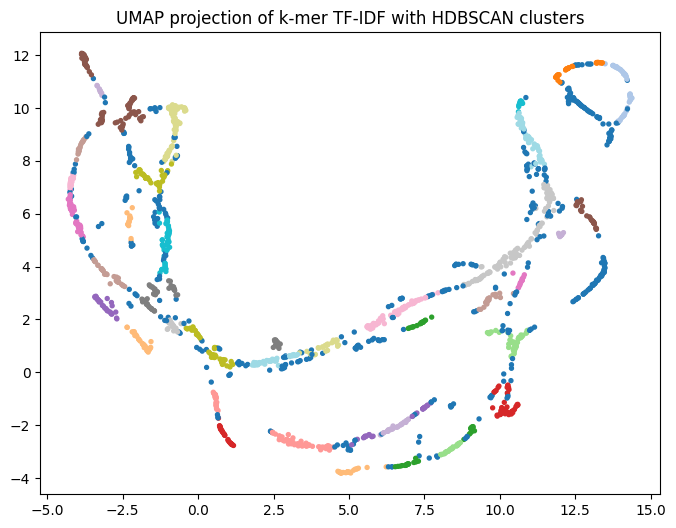

In [ ]:
import umap
import hdbscan
import matplotlib.pyplot as plt
import numpy as np

reducer = umap.UMAP(n_components=2, random_state=42)
X_emb = reducer.fit_transform(X_tfidf.toarray()[:2000])
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
clusters = clusterer.fit_predict(X_emb)

plt.figure(figsize=(8,6))
plt.scatter(X_emb[:,0], X_emb[:,1], c=clusters, cmap='tab20', s=8)
plt.title("UMAP projection of k-mer TF-IDF with HDBSCAN clusters")
plt.show()


In [ ]:

!pip install -q hdbscan pyarrow faiss-cpu transformers accelerate

import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import hdbscan
import torch
from sklearn.preprocessing import StandardScaler

reads = read_records[:20000]
lab = labels[:len(reads)]

try:
    X_emb
    print("Using existing X_emb from UMAP.")
except NameError:
    print("No X_emb found. Building a quick HashingVectorizer+TF-IDF -> PCA for embedding (fast).")
    from sklearn.feature_extraction.text import HashingVectorizer, TfidfTransformer
    from sklearn.decomposition import TruncatedSVD
    hv = HashingVectorizer(analyzer='char', ngram_range=(4,8), n_features=2**18)
    X_hash = hv.transform(reads)
    X_tfidf = TfidfTransformer().fit_transform(X_hash)
    svd = TruncatedSVD(n_components=128, random_state=42)
    X_emb = svd.fit_transform(X_tfidf)


scaler = StandardScaler()
X_std = scaler.fit_transform(X_emb)


clusterer = hdbscan.HDBSCAN(min_cluster_size=20, prediction_data=True)
cluster_labels = clusterer.fit_predict(X_std)

hdb_out = clusterer.outlier_scores_
if len(hdb_out) != len(reads):
    hdb_out = np.zeros(len(reads))

iso = IsolationForest(n_estimators=200, contamination=0.02, random_state=42)
iso.fit(X_std)
iso_scores = -iso.decision_function(X_std)


lof = LocalOutlierFactor(n_neighbors=35, contamination=0.02, novelty=False)
lof_preds = lof.fit_predict(X_std)

lof_scores = -lof.negative_outlier_factor_

try:
    oc = OneClassSVM(gamma='auto', nu=0.02)
    oc.fit(X_std)
    oc_scores = -oc.decision_function(X_std)
except Exception as e:
    print("OneClassSVM skipped:", e)
    oc_scores = np.zeros(len(reads))

min_len = min(len(hdb_out), len(iso_scores), len(lof_scores), len(oc_scores))
scores = np.vstack([hdb_out[:min_len], iso_scores[:min_len], lof_scores[:min_len], oc_scores[:min_len]])
consensus = np.nanmean(scores, axis=0)
rank_idx = np.argsort(-consensus)


N = 50
top_idx = rank_idx[:N]
df = pd.DataFrame({
    'index': top_idx,
    'consensus_score': consensus[top_idx],
    'hdb_out': hdb_out[top_idx],
    'iso_score': iso_scores[top_idx],
    'lof_score': lof_scores[top_idx],
    'oc_score': oc_scores[top_idx],
    'label': [lab[i] for i in top_idx],
    'sequence': [reads[i][:200] + ('...' if len(reads[i])>200 else '') for i in top_idx]
})
display(df.head(30))

df.to_csv('/content/top_outliers.csv', index=False)
print("Saved top outliers to /content/top_outliers.csv")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 66.9 MB/s eta 0:00:00
Using existing X_emb from UMAP.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,index,consensus_score,hdb_out,iso_score,lof_score,oc_score,label,sequence
0,318,0.306503,0.0,-0.066925,1.374605,-0.081668,NG_061033.1,CAAAGATTAAGCCATGCATGTCTAAGTATAAGCAATCTATACTGTG...
1,367,0.301817,0.0,-0.070597,1.278002,-0.000135,NG_061032.1,CAGTGATGCGACTCATTAGGCCGTCGTAACGCGCGCTAAGGTACCG...
2,384,0.299146,0.0,-0.070597,1.270136,-0.002954,NG_061032.1,GGCGAGCCGAGGAGCAGTGATGCGACTCATTAGGCCGTCGTAACGC...
3,1974,0.293837,0.0,-0.007483,1.167368,0.015465,NG_062442.1,ATCAGTATTCAATTGTCAGAGGTGAAATTCTTGGATTTATTGAAGA...
4,390,0.293305,0.0,-0.069393,1.248551,-0.005937,NG_061032.1,GGTCAGCTTTGGTTACTCAAAGTTGGCTCAAGGGACGTGCTAATCC...
5,1933,0.288113,0.0,-0.010836,1.162697,0.000592,NG_061300.1,ATCAGTATTCAATTGTCAGAGGTGAAATTCTTGGATTTATTGAAGA...
6,354,0.286709,0.0,-0.073890,1.242410,-0.021685,NG_061032.1,AACCAGGCTATGGTAATCCCGTGGCGAGCCGAGGAGCAGTGATGCG...
7,1833,0.285886,0.0,-0.010640,1.159895,-0.005712,NG_070799.1,TTCAATTGTCAGAGGTGAAATTCTTGGATTTATTGAAGACTAACTA...
8,253,0.285093,0.0,-0.013514,1.148848,0.005039,NG_065156.1,AATTCTTGGATTTATTGAAGACTAACTACTGCGAAAGCATTTGCCA...
9,1786,0.284997,0.0,-0.011467,1.159417,-0.007962,NG_063107.1,AGTATTCAATTGTCAGAGGTGAAATTCTTGGATTTATTGAAGACTA...


Saved top outliers to /content/top_outliers.csv


In [ ]:

from collections import Counter
import math

def gc_content(seq):
    seq = seq.upper()
    gc = seq.count('G') + seq.count('C')
    return gc / max(1, len(seq))

def kmer_entropy(seq, k=4):
    if len(seq) < k: return 0.0
    kmers = [seq[i:i+k] for i in range(len(seq)-k+1)]
    freqs = Counter(kmers)
    probs = np.array(list(freqs.values()), dtype=np.float32)
    probs = probs / probs.sum()
    return float(-(probs * np.log2(probs + 1e-12)).sum())

def max_homopolymer(seq):
    maxlen = cur = 1
    seq = seq.upper()
    for i in range(1, len(seq)):
        if seq[i] == seq[i-1]:
            cur += 1
        else:
            if cur > maxlen: maxlen = cur
            cur = 1
    return max(maxlen, cur)

def percent_N(seq):
    return seq.upper().count('N') / max(1, len(seq))

def positional_kmer_windows(seq, k=4, window=50, step=25):

    ents = []
    for start in range(0, max(1, len(seq) - window + 1), step):
        window_seq = seq[start:start+window]
        ents.append(kmer_entropy(window_seq, k=k))
    if not ents:
        return [0.0, 0.0]
    return [float(np.mean(ents)), float(np.std(ents))]


sample_reads = reads[:12000]

from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import VarianceThreshold
from scipy.sparse import hstack, csr_matrix

hv = HashingVectorizer(analyzer='char', ngram_range=(4,8), n_features=2**19, alternate_sign=False)
X_hash = hv.transform(sample_reads)


scalar_feats = []
for seq in sample_reads:
    scalar_feats.append([
        len(seq),
        gc_content(seq),
        kmer_entropy(seq, k=4),
        kmer_entropy(seq, k=6),
        max_homopolymer(seq),
        percent_N(seq),
        *positional_kmer_windows(seq, k=4, window=100, step=50)
    ])
scalar_feats = np.array(scalar_feats, dtype=np.float32)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalar_feats_scaled = scaler.fit_transform(scalar_feats)


scalar_sparse = csr_matrix(scalar_feats_scaled)
X_combined = hstack([X_hash, scalar_sparse], format='csr')

print("Combined feature shape:", X_combined.shape)

import joblib
joblib.dump({'hv':hv, 'scaler':scaler}, '/content/feature_tools.pkl')
print("Feature tools saved to /content/feature_tools.pkl")


Combined feature shape: (2050, 524296)
Feature tools saved to /content/feature_tools.pkl


In [ ]:

!pip install -q torch torchvision


import torch, torch.nn as nn
import numpy as np


BASES = {'A':0,'C':1,'G':2,'T':3,'N':4}
def one_hot_encode(seq, max_len=300):

    arr = np.zeros((max_len, 5), dtype=np.float32)
    s = seq.upper()[:max_len]
    for i,ch in enumerate(s):
        idx = BASES.get(ch, 4)
        arr[i, idx] = 1.0
    return arr


class SimpleDNACNN(nn.Module):
    def __init__(self, emb_dim=256):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(5, 128, kernel_size=9, padding=4),
            nn.ReLU(),
            nn.MaxPool1d(4),
            nn.Conv1d(128, 256, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )
        self.fc = nn.Linear(256, emb_dim)
    def forward(self, x):
        x = x.permute(0,2,1)
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleDNACNN(emb_dim=256).to(device)


sample = read_records[:128]
X = np.stack([one_hot_encode(s, max_len=300) for s in sample])
X_t = torch.tensor(X).to(device)
with torch.no_grad():
    out = model(X_t).cpu().numpy()
print("CNN embeddings shape:", out.shape)
np.save('/content/cnn_emb_sample.npy', out)
print("Saved to /content/cnn_emb_sample.npy")


CNN embeddings shape: (128, 256)
Saved to /content/cnn_emb_sample.npy


In [ ]:
import numpy as np, os, joblib, math
import torch


BATCH = 256
MAX_LEN = 300
OUT_EMB = '/content/cnn_embeddings.npy'
OUT_MAP = '/content/emb_index_map.csv'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

N = len(read_records)
print("Total reads to embed:", N)


emb_dim = 256
mmap = np.memmap(OUT_EMB, dtype='float32', mode='w+', shape=(N, emb_dim))

import csv
with open(OUT_MAP, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['idx','label','seq_snippet'])
    for i in range(0, N, BATCH):
        batch_seqs = read_records[i:i+BATCH]
        X = np.stack([one_hot_encode(s, max_len=MAX_LEN) for s in batch_seqs]).astype(np.float32)
        X_t = torch.tensor(X).to(device)
        with torch.no_grad():
            emb = model(X_t).cpu().numpy()
        mmap[i:i+emb.shape[0]] = emb
        for j,seq in enumerate(batch_seqs):
            writer.writerow([i+j, labels[i+j] if i+j < len(labels) else '', seq[:200]])
        if (i//BATCH) % 10 == 0:
            print(f"Embedded {i}/{N}")
print("Embedding finished. Flushing to disk...")
mmap.flush()
print("Saved embeddings to", OUT_EMB)
print("Saved index map to", OUT_MAP)


Total reads to embed: 2050
Embedded 0/2050
Embedding finished. Flushing to disk...
Saved embeddings to /content/cnn_embeddings.npy
Saved index map to /content/emb_index_map.csv


In [ ]:

import numpy as np, os, math, joblib
from sklearn.preprocessing import StandardScaler
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader

EMB_PATH = '/content/cnn_embeddings.npy'
RESHAPED_PATH = '/content/cnn_embeddings_reshaped.npy'


emb = None
try:

    emb = np.load(EMB_PATH, mmap_mode='r')
    print("np.load succeeded. shape:", emb.shape)
except Exception as e:
    print("np.load failed or file lacks header; falling back to np.memmap.", str(e))
    emb = np.memmap(EMB_PATH, dtype='float32', mode='r')
    print("memmap loaded. flat length:", emb.shape)


if emb.ndim == 1:
    total = emb.shape[0]
    inferred = None

    try:
        L = len(labels)
        if L>0 and total % L == 0:
            inferred = total // L
            print(f"Inferred emb_dim from labels: {inferred} (total {total} / {L} labels)")
    except Exception:
        L = 0

    if inferred is None:
        for cand in (256, 512, 128, 1024, 64):
            if total % cand == 0:
                inferred = cand
                print(f"Inferred emb_dim by divisor heuristic: {inferred}")
                break
    if inferred is None:

        inferred = 256
        print(f"Could not infer emb_dim automatically. Falling back to default emb_dim={inferred}")
    emb_dim = inferred
    nrows = total // emb_dim
    print(f"Reshaping flat array of length {total} -> ({nrows}, {emb_dim})")
    emb_reshaped = np.array(emb).reshape(nrows, emb_dim)
else:
    emb_reshaped = np.array(emb)
    emb_dim = emb_reshaped.shape[1]
    print("Embeddings already 2D with shape:", emb_reshaped.shape)

np.save(RESHAPED_PATH, emb_reshaped)
print("Saved reshaped embeddings to:", RESHAPED_PATH)


n_samples = emb_reshaped.shape[0]
print("n_samples:", n_samples, "emb_dim:", emb_dim)
if 'labels' in globals():
    print("len(labels):", len(labels))
    if len(labels) != n_samples:
        print("WARNING: labels length != n_samples. You may need to trim labels or check mapping.")
    else:
        print("labels length matches n_samples.")


scaler = StandardScaler()

X_scaled = scaler.fit_transform(emb_reshaped)
joblib.dump(scaler, '/content/emb_scaler.pkl')
print("Saved scaler to /content/emb_scaler.pkl")


class MemmapDataset(Dataset):
    def __init__(self, npy_path):
        self.data = np.load(npy_path, mmap_mode='r')
        self.len = self.data.shape[0]
    def __len__(self):
        return self.len
    def __getitem__(self, idx):
        x = self.data[idx].astype('float32')
        return x


class VAE(nn.Module):
    def __init__(self, input_dim=256, latent_dim=64, hidden=256):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden)
        self.fc_mu = nn.Linear(hidden, latent_dim)
        self.fc_logvar = nn.Linear(hidden, latent_dim)
        self.fc_decode = nn.Linear(latent_dim, hidden)
        self.fc_out = nn.Linear(hidden, input_dim)
        self.act = nn.ReLU()
    def encode(self, x):
        h = self.act(self.fc1(x))
        return self.fc_mu(h), self.fc_logvar(h)
    def reparam(self, mu, logvar):
        std = (0.5*logvar).exp()
        eps = torch.randn_like(std)
        return mu + eps*std
    def decode(self, z):
        h = self.act(self.fc_decode(z))
        return self.fc_out(h)
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparam(mu, logvar)
        xrec = self.decode(z)
        return xrec, mu, logvar


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset = MemmapDataset(RESHAPED_PATH)
batch_size = 256
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)

input_dim = emb_dim
vae = VAE(input_dim=input_dim, latent_dim=64, hidden=256).to(device)
opt = optim.Adam(vae.parameters(), lr=1e-3)
epochs = 50
best_loss = 1e9
patience = 8
wait = 0

for epoch in range(epochs):
    vae.train()
    total_loss = 0.0
    count = 0
    for batch in dataloader:
        xb = batch.to(device)
        opt.zero_grad()
        xrec, mu, logvar = vae(xb)
        recon_loss = ((xrec - xb)**2).mean()
        kld = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
        loss = recon_loss + 1e-3 * kld
        loss.backward()
        opt.step()
        total_loss += loss.item() * xb.size(0)
        count += xb.size(0)
    avg_loss = total_loss / count
    print(f"Epoch {epoch+1}/{epochs} avg_loss: {avg_loss:.6f}")
    if avg_loss + 1e-8 < best_loss:
        best_loss = avg_loss
        wait = 0
        torch.save(vae.state_dict(), '/content/vae_best.pt')
        print("Saved best VAE.")
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping.")
            break


vae.load_state_dict(torch.load('/content/vae_best.pt', map_location=device))
vae.eval()

recon_errs = np.zeros(n_samples, dtype=np.float32)
latent_means = np.zeros((n_samples, 64), dtype=np.float32)

idx = 0
with torch.no_grad():
    for batch in DataLoader(dataset, batch_size=batch_size, shuffle=False):
        b = batch.to(device)
        xrec, mu, logvar = vae(b)
        b_np = b.cpu().numpy()
        xrec_np = xrec.cpu().numpy()
        mu_np = mu.cpu().numpy()
        bs = b_np.shape[0]
        recon_errs[idx:idx+bs] = np.mean((xrec_np - b_np)**2, axis=1)
        latent_means[idx:idx+bs] = mu_np
        idx += bs


centroid = latent_means.mean(axis=0)
latent_dist = np.linalg.norm(latent_means - centroid[None,:], axis=1)

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
nov_score = mm.fit_transform(np.vstack([recon_errs, latent_dist]).T).mean(axis=1)


import pandas as pd, csv
topN = 200
idxs = np.argsort(-nov_score)[:topN]
rows = []
for i in idxs:
    rows.append([int(i), labels[i] if i < len(labels) else '', float(nov_score[i]), float(recon_errs[i]), float(latent_dist[i]), read_records[i][:200]])
df = pd.DataFrame(rows, columns=['idx','label','nov_score','recon_err','latent_dist','seq_snip'])
df.to_csv('/content/novel_candidates.csv', index=False)
print("Saved novel candidates to /content/novel_candidates.csv. Preview:")
display(df.head(30))


np.load failed or file lacks header; falling back to np.memmap. Cannot load file containing pickled data when allow_pickle=False
memmap loaded. flat length: (524800,)
Inferred emb_dim from labels: 256 (total 524800 / 2050 labels)
Reshaping flat array of length 524800 -> (2050, 256)
Saved reshaped embeddings to: /content/cnn_embeddings_reshaped.npy
n_samples: 2050 emb_dim: 256
len(labels): 2050
labels length matches n_samples.
Saved scaler to /content/emb_scaler.pkl
Epoch 1/50 avg_loss: 0.035344
Saved best VAE.
Epoch 2/50 avg_loss: 0.015795
Saved best VAE.
Epoch 3/50 avg_loss: 0.006942
Saved best VAE.
Epoch 4/50 avg_loss: 0.003327
Saved best VAE.
Epoch 5/50 avg_loss: 0.002082
Saved best VAE.
Epoch 6/50 avg_loss: 0.001561
Saved best VAE.
Epoch 7/50 avg_loss: 0.001300
Saved best VAE.
Epoch 8/50 avg_loss: 0.001147
Saved best VAE.
Epoch 9/50 avg_loss: 0.001025
Saved best VAE.
Epoch 10/50 avg_loss: 0.000939
Saved best VAE.
Epoch 11/50 avg_loss: 0.000875
Saved best VAE.
Epoch 12/50 avg_loss: 

,idx,label,nov_score,recon_err,latent_dist,seq_snip
0,1534,NG_061036.1,0.737410,0.000834,0.029233,AGGCCGGCTTTGGCTGGTCGTTTGACTTCTTAGAGGGACTGTCGGC...
1,1838,NG_070799.1,0.681669,0.000448,0.049790,ATAAACTATGCCGACTAGGGATCGGGTGGTGTTTTTTTAATGACCC...
2,810,NG_063101.1,0.677224,0.000636,0.036091,GATCGAATACATTAGAATGGAATAATAGAATAGGACATCGGTTCTA...
3,206,NG_063111.1,0.657610,0.000786,0.023271,TAATAGGGATAGTCGGGGGCGTCAGTATTCGGCTGTCAGAGGTGAA...
4,190,NG_063110.1,0.588877,0.000327,0.047527,TAGGGATCGGACGGGGTTTCTTTTATGACCCGTTCGGCACCTTACG...
5,1659,NG_063104.1,0.571918,0.000565,0.028790,TGTGATGCCCTTAGACGTTCTGGGCCGCACGCGCGCTACACTGACG...
6,280,NG_065156.1,0.570832,0.000665,0.021674,CAATAACAGGTCTGTGATGCCCTTAGACGTTCTGGGCCGCACGCGC...
7,154,NG_063110.1,0.563709,0.000145,0.057378,TGAACCTTGGGTCTGGCTGGCCGGTCCGCCTCACGGCGTGCACTGG...
8,902,NG_065802.1,0.550424,0.000390,0.038610,TGCCGACTAGGGGTCGGACGGTGGTTTTTTTATGCCCCGTTCGGAA...
9,1815,NG_070799.1,0.546461,0.000686,0.017338,GCAAATTACCCAATCCTAATTCAGGGAGGTAGTGACAATAAATAAC...


In [ ]:
import pandas as pd, numpy as np
nov = pd.read_csv('/content/novel_candidates.csv')
print("Novel candidates shape:", nov.shape)
display(nov.head(10))

from collections import Counter
if 'labels' in globals():
    cnts = Counter(labels)
    top_labels = pd.DataFrame(cnts.most_common(30), columns=['label','count'])
    print("Top labels in whole dataset:")
    display(top_labels.head(20))
else:
    print("`labels` list not found in scope.")


nov_counts = nov['label'].value_counts().reset_index()
nov_counts.columns = ['label','nov_candidate_count']
display(nov_counts.head(30))

nov_summary = nov.groupby('label')['nov_score'].agg(['count','mean']).reset_index().sort_values('count', ascending=False)
nov_summary.columns = ['label','nov_count','nov_score_mean']
display(nov_summary.head(30))


Novel candidates shape: (200, 6)


,idx,label,nov_score,recon_err,latent_dist,seq_snip
0,1534,NG_061036.1,0.737410,0.000834,0.029233,AGGCCGGCTTTGGCTGGTCGTTTGACTTCTTAGAGGGACTGTCGGC...
1,1838,NG_070799.1,0.681669,0.000448,0.049790,ATAAACTATGCCGACTAGGGATCGGGTGGTGTTTTTTTAATGACCC...
2,810,NG_063101.1,0.677224,0.000636,0.036091,GATCGAATACATTAGAATGGAATAATAGAATAGGACATCGGTTCTA...
3,206,NG_063111.1,0.657610,0.000786,0.023271,TAATAGGGATAGTCGGGGGCGTCAGTATTCGGCTGTCAGAGGTGAA...
4,190,NG_063110.1,0.588877,0.000327,0.047527,TAGGGATCGGACGGGGTTTCTTTTATGACCCGTTCGGCACCTTACG...
5,1659,NG_063104.1,0.571918,0.000565,0.028790,TGTGATGCCCTTAGACGTTCTGGGCCGCACGCGCGCTACACTGACG...
6,280,NG_065156.1,0.570832,0.000665,0.021674,CAATAACAGGTCTGTGATGCCCTTAGACGTTCTGGGCCGCACGCGC...
7,154,NG_063110.1,0.563709,0.000145,0.057378,TGAACCTTGGGTCTGGCTGGCCGGTCCGCCTCACGGCGTGCACTGG...
8,902,NG_065802.1,0.550424,0.000390,0.038610,TGCCGACTAGGGGTCGGACGGTGGTTTTTTTATGCCCCGTTCGGAA...
9,1815,NG_070799.1,0.546461,0.000686,0.017338,GCAAATTACCCAATCCTAATTCAGGGAGGTAGTGACAATAAATAAC...


Top labels in whole dataset:


,label,count
0,NG_065155.1,50
1,NG_065153.1,50
2,NG_062683.1,50
3,NG_063110.1,50
4,NG_063111.1,50
5,NG_065156.1,50
6,NG_061033.1,50
7,NG_061032.1,50
8,NG_061105.1,50
9,NG_062443.1,50


,label,nov_candidate_count
0,NG_062442.1,10
1,NG_063110.1,9
2,NG_070799.1,8
3,NG_061040.1,8
4,NG_063108.1,8
5,NG_065159.1,8
6,NG_065156.1,7
7,NG_062141.1,7
8,NG_062443.1,7
9,NG_063101.1,6


,label,nov_count,nov_score_mean
11,NG_062442.1,10,0.398155
21,NG_063110.1,9,0.464765
6,NG_061040.1,8,0.385444
38,NG_070799.1,8,0.454991
20,NG_063108.1,8,0.384752
34,NG_065159.1,8,0.386543
31,NG_065156.1,7,0.411269
12,NG_062443.1,7,0.376738
10,NG_062141.1,7,0.373536
22,NG_063111.1,6,0.444321


In [ ]:

from collections import Counter
def gc_content(seq): return (seq.upper().count('G') + seq.upper().count('C')) / max(1, len(seq))
def percent_N(seq): return seq.upper().count('N') / max(1, len(seq))
def max_homopolymer(seq):
    maxlen = cur = 1
    s = seq.upper()
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            cur += 1
        else:
            if cur > maxlen: maxlen = cur
            cur = 1
    return max(maxlen, cur)

top = nov.copy()
top['gc'] = top['seq_snip'].apply(gc_content)
top['pctN'] = top['seq_snip'].apply(percent_N)
top['max_homopolymer'] = top['seq_snip'].apply(max_homopolymer)
top['len'] = top['seq_snip'].apply(len)

display(top[['idx','label','nov_score','recon_err','latent_dist','len','gc','pctN','max_homopolymer']].head(40))


print("Candidates with pctN > 0.05:", (top['pctN'] > 0.05).sum())
print("Candidates with max_homopolymer > 12:", (top['max_homopolymer'] > 12).sum())
print("Candidates len < 80:", (top['len'] < 80).sum())


,idx,label,nov_score,recon_err,latent_dist,len,gc,pctN,max_homopolymer
0,1534,NG_061036.1,0.737410,0.000834,0.029233,150,0.573333,0.0,3
1,1838,NG_070799.1,0.681669,0.000448,0.049790,150,0.493333,0.0,7
2,810,NG_063101.1,0.677224,0.000636,0.036091,150,0.366667,0.0,5
3,206,NG_063111.1,0.657610,0.000786,0.023271,150,0.460000,0.0,5
4,190,NG_063110.1,0.588877,0.000327,0.047527,150,0.506667,0.0,6
5,1659,NG_063104.1,0.571918,0.000565,0.028790,150,0.533333,0.0,4
6,280,NG_065156.1,0.570832,0.000665,0.021674,150,0.513333,0.0,4
7,154,NG_063110.1,0.563709,0.000145,0.057378,150,0.586667,0.0,6
8,902,NG_065802.1,0.550424,0.000390,0.038610,150,0.553333,0.0,7
9,1815,NG_070799.1,0.546461,0.000686,0.017338,150,0.446667,0.0,3


Candidates with pctN > 0.05: 0
Candidates with max_homopolymer > 12: 0
Candidates len < 80: 0


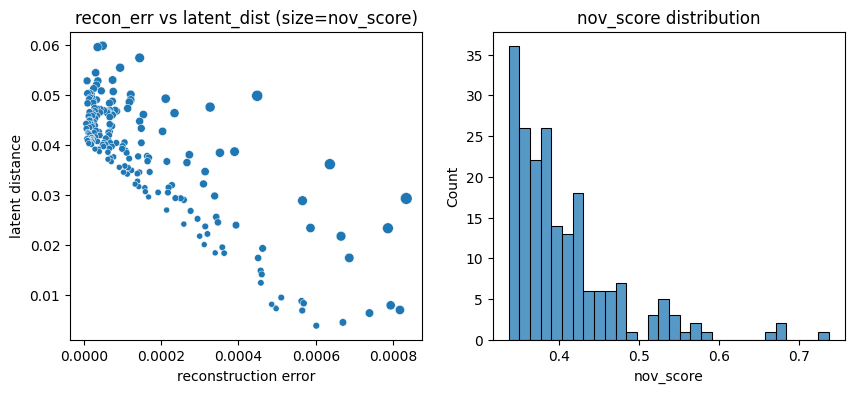

Top by recon_err:


,idx,label,nov_score,recon_err,latent_dist
0,1534,NG_061036.1,0.737410,0.000834,0.029233
11,1993,NG_062442.1,0.535822,0.000817,0.006911
13,1596,NG_061037.1,0.529425,0.000793,0.007842
3,206,NG_063111.1,0.657610,0.000786,0.023271
21,832,NG_063101.1,0.483049,0.000739,0.006289
9,1815,NG_070799.1,0.546461,0.000686,0.017338
50,367,NG_061032.1,0.425647,0.000670,0.004422
6,280,NG_065156.1,0.570832,0.000665,0.021674
2,810,NG_063101.1,0.677224,0.000636,0.036091
112,1019,NG_065157.1,0.378424,0.000601,0.003758


Top by latent_dist:


,idx,label,nov_score,recon_err,latent_dist
14,245,NG_063111.1,0.527015,0.000049,0.059813
17,4,NG_065155.1,0.516635,0.000036,0.059533
7,154,NG_063110.1,0.563709,0.000145,0.057378
18,1130,NG_065158.1,0.516374,0.000094,0.055414
28,986,NG_065154.1,0.469620,0.000031,0.054404
20,937,NG_065802.1,0.483517,0.000075,0.052949
40,1246,NG_070788.1,0.442307,0.000009,0.052780
30,195,NG_063110.1,0.458889,0.000036,0.052759
34,1892,NG_065159.1,0.449621,0.000033,0.051941
41,1787,NG_063107.1,0.439123,0.000025,0.051225


In [ ]:
import matplotlib.pyplot as plt, seaborn as sns
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(x='recon_err', y='latent_dist', size='nov_score', data=nov, legend=False)
plt.title('recon_err vs latent_dist (size=nov_score)')
plt.xlabel('reconstruction error'); plt.ylabel('latent distance')

plt.subplot(1,2,2)
sns.histplot(nov['nov_score'], bins=30)
plt.title('nov_score distribution')
plt.show()


print("Top by recon_err:")
display(nov.sort_values('recon_err', ascending=False).head(20)[['idx','label','nov_score','recon_err','latent_dist']])
print("Top by latent_dist:")
display(nov.sort_values('latent_dist', ascending=False).head(20)[['idx','label','nov_score','recon_err','latent_dist']])


In [ ]:
import numpy as np

EMB_RESHAPED = '/content/cnn_embeddings_reshaped.npy'
embs = np.load(EMB_RESHAPED, mmap_mode='r')
print("emb shape:", embs.shape)


from collections import defaultdict
label_to_idxs = defaultdict(list)
for i,l in enumerate(labels):
    label_to_idxs[l].append(i)


label_stats = []
for label, idxs in list(label_to_idxs.items())[:5000]:
    arr = embs[idxs]
    centroid = arr.mean(axis=0)
    dists = np.linalg.norm(arr - centroid[None,:], axis=1)
    label_stats.append((label, len(idxs), dists.mean(), dists.std(), dists.max()))
lbl_df = pd.DataFrame(label_stats, columns=['label','count','dist_mean','dist_std','dist_max']).sort_values('count', ascending=False)
display(lbl_df.head(30))


outlier_rows = []
for _, row in nov.iterrows():
    i = int(row['idx'])
    lab = row['label']
    if lab in label_to_idxs:
        idxs = label_to_idxs[lab]
        centroid = embs[idxs].mean(axis=0)
        dist = np.linalg.norm(embs[i] - centroid)
        stats = lbl_df[lbl_df['label']==lab]
        if not stats.empty:
            mean, std = stats.iloc[0]['dist_mean'], stats.iloc[0]['dist_std']
            extreme = dist > (mean + 3*std)
            outlier_rows.append((i, lab, dist, mean, std, extreme, row['nov_score']))
    else:
        outlier_rows.append((i, lab, np.nan, np.nan, np.nan, True, row['nov_score']))
out_df = pd.DataFrame(outlier_rows, columns=['idx','label','dist','label_mean','label_std','is_extreme','nov_score'])
display(out_df.sort_values('dist', ascending=False).head(50))


emb shape: (2050, 256)


,label,count,dist_mean,dist_std,dist_max
0,NG_065155.1,50,0.038477,0.006925,0.057528
1,NG_065153.1,50,0.038280,0.009598,0.064015
2,NG_062683.1,50,0.035858,0.006997,0.052700
3,NG_063110.1,50,0.035947,0.008050,0.057732
4,NG_063111.1,50,0.033593,0.007014,0.058623
5,NG_065156.1,50,0.039102,0.007999,0.059545
6,NG_061033.1,50,0.034927,0.006794,0.059220
7,NG_061032.1,50,0.038622,0.006756,0.056759
8,NG_061105.1,50,0.036007,0.006188,0.050218
9,NG_062443.1,50,0.041242,0.008346,0.064295


,idx,label,dist,label_mean,label_std,is_extreme,nov_score
124,1950,NG_062442.1,0.067263,0.041618,0.008722,False,0.372749
65,513,NG_062140.1,0.066584,0.036653,0.007307,True,0.414189
16,1142,NG_065158.1,0.065677,0.039512,0.008260,True,0.523010
42,680,NG_063524.1,0.065626,0.036496,0.008772,True,0.438744
98,1904,NG_061300.1,0.063195,0.039440,0.007413,True,0.385315
80,55,NG_065153.1,0.062737,0.038280,0.009598,False,0.398445
35,1055,NG_065803.1,0.062537,0.041858,0.009302,False,0.447232
18,1130,NG_065158.1,0.061396,0.039512,0.008260,False,0.516374
25,1835,NG_070799.1,0.060935,0.040733,0.009433,False,0.472068
79,1985,NG_062442.1,0.060379,0.041618,0.008722,False,0.401897


embedding slice shape: (200, 256)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


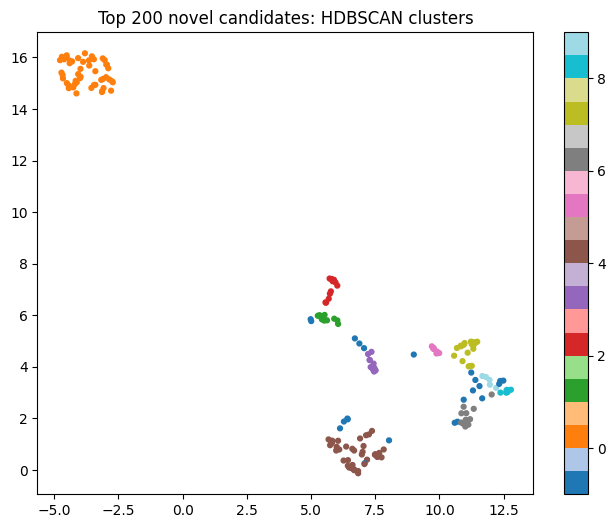

,cluster,size
0,0,49
1,4,40
2,-1,23
3,7,18
4,6,13
5,2,13
6,1,12
7,3,11
8,8,8
9,5,8


Cluster 0


,idx,cluster,label,nov_score
16,1142,0,NG_065158.1,0.523010
17,4,0,NG_065155.1,0.516635
18,1130,0,NG_065158.1,0.516374
22,1669,0,NG_063104.1,0.477475
23,1966,0,NG_062442.1,0.474613
24,143,0,NG_062683.1,0.473090
25,1835,0,NG_070799.1,0.472068
29,1739,0,NG_063108.1,0.464714
31,1697,0,NG_063104.1,0.458240
33,281,0,NG_065156.1,0.454778


Cluster 4


,idx,cluster,label,nov_score
1,1838,4,NG_070799.1,0.681669
4,190,4,NG_063110.1,0.588877
8,902,4,NG_065802.1,0.550424
12,1150,4,NG_062444.1,0.534145
20,937,4,NG_065802.1,0.483517
39,800,4,NG_063101.1,0.443160
40,1246,4,NG_070788.1,0.442307
56,271,4,NG_065156.1,0.421257
62,36,4,NG_065155.1,0.417309
64,1634,4,NG_063105.1,0.415315


Cluster -1


,idx,cluster,label,nov_score
0,1534,-1,NG_061036.1,0.737410
2,810,-1,NG_063101.1,0.677224
11,1993,-1,NG_062442.1,0.535822
21,832,-1,NG_063101.1,0.483049
27,445,-1,NG_061105.1,0.470235
38,1535,-1,NG_061036.1,0.445014
50,367,-1,NG_061032.1,0.425647
63,1245,-1,NG_070788.1,0.416403
89,1754,-1,NG_063107.1,0.391958
90,1582,-1,NG_061037.1,0.390303


Cluster 7


,idx,cluster,label,nov_score
5,1659,7,NG_063104.1,0.571918
6,280,7,NG_065156.1,0.570832
37,1500,7,NG_061036.1,0.446465
80,55,7,NG_065153.1,0.398445
83,553,7,NG_063521.1,0.397389
95,332,7,NG_061033.1,0.386387
106,401,7,NG_061105.1,0.381039
118,1679,7,NG_063104.1,0.376121
139,969,7,NG_065154.1,0.362186
143,1477,7,NG_063532.1,0.360721


Cluster 6


,idx,cluster,label,nov_score
10,1584,6,NG_061037.1,0.537389
34,1892,6,NG_065159.1,0.449621
48,1873,6,NG_065159.1,0.426245
57,1141,6,NG_065158.1,0.420532
82,458,6,NG_062443.1,0.397566
119,37,6,NG_065155.1,0.375179
129,1168,6,NG_062444.1,0.370948
132,1955,6,NG_062442.1,0.367095
155,1680,6,NG_063104.1,0.353987
178,781,6,NG_062141.1,0.344113


Cluster 2


,idx,cluster,label,nov_score
9,1815,2,NG_070799.1,0.546461
69,1828,2,NG_070799.1,0.409579
73,1602,2,NG_063105.1,0.406477
86,1361,2,NG_061040.1,0.394791
94,1920,2,NG_061300.1,0.386996
112,1019,2,NG_065157.1,0.378424
114,1798,2,NG_063107.1,0.378135
117,28,2,NG_065155.1,0.376250
126,1983,2,NG_062442.1,0.371584
166,1968,2,NG_062442.1,0.348334


In [ ]:
!pip install -q umap-learn hdbscan
import umap, hdbscan, numpy as np
topN = min(500, len(nov))
top_idxs = nov['idx'].astype(int).values[:topN]
emb_top = embs[top_idxs]
print("embedding slice shape:", emb_top.shape)


reducer = umap.UMAP(n_components=2, random_state=42)
proj = reducer.fit_transform(emb_top)


clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1)
clusters = clusterer.fit_predict(emb_top)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(proj[:,0], proj[:,1], c=clusters, cmap='tab20', s=12)
plt.title(f"Top {topN} novel candidates: HDBSCAN clusters")
plt.colorbar()
plt.show()


import pandas as pd
cluster_df = pd.DataFrame({'idx':top_idxs, 'cluster':clusters, 'label': nov['label'].values[:topN], 'nov_score': nov['nov_score'].values[:topN]})
sizes = cluster_df['cluster'].value_counts().reset_index()
sizes.columns = ['cluster','size']
display(sizes.sort_values('size', ascending=False).head(20))


top_clusters = sizes['cluster'].tolist()[:6]
for c in top_clusters:
    print("Cluster", c)
    display(cluster_df[cluster_df['cluster']==c].head(10))


In [ ]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

top_for_blast = nov.head(50)
records = []
for i,row in top_for_blast.iterrows():
    idx = int(row['idx'])
    seq = read_records[idx]
    rec = SeqRecord(Seq(seq), id=f"cand_{idx}", description=f"nov_score={row['nov_score']}_label={row['label']}")
    records.append(rec)
fasta_path = '/content/top50_novel_candidates.fasta'
SeqIO.write(records, fasta_path, 'fasta')
print("Wrote", fasta_path)


Wrote /content/top50_novel_candidates.fasta


In [ ]:

!blastn -query /content/top50_novel_candidates.fasta -db /content/blast_project/data/18S_fungal_sequences -outfmt "6 qseqid sseqid pident length evalue bitscore stitle" -max_target_seqs 5 -num_threads 4 > /content/top50_blast.tsv
!head -n 30 /content/top50_blast.tsv || true


cand_1534	gi|1433537144|ref|NG_061036.1|	100.000	150	1.20e-75	278	Cryptococcus wingfieldii JCM 7368 18S rRNA gene, partial sequence; from TYPE material
cand_1534	gi|2689419041|ref|NG_242365.1|	98.013	151	1.20e-70	261	Cryptococcus tetragattii WM 779 18S rRNA gene, partial sequence; from TYPE material
cand_1534	gi|1632313335|ref|NG_064879.1|	98.013	151	1.20e-70	261	Cryptococcus deneoformans CBS 6900 18S rRNA gene, partial sequence; from TYPE material
cand_1534	gi|1503120285|ref|NG_062158.1|	99.281	139	7.25e-68	252	Vishniacozyma heimaeyensis CBS 8933 18S rRNA gene, partial sequence; from TYPE material
cand_1534	gi|1535923999|ref|NG_062973.1|	96.667	150	9.38e-67	248	Sirobasidium magnum CBS 6803 18S rRNA gene, partial sequence; from TYPE material
cand_1838	gi|1694443755|ref|NG_065576.1|	100.000	150	1.20e-75	278	Saccharomyces arboricola CGMCC AS 2.3317 18S rRNA gene, partial sequence; from TYPE material
cand_1838	gi|1543850741|ref|NG_063240.1|	100.000	150	1.20e-75	278	Kazachstania viticola N

In [ ]:
import pandas as pd, numpy as np

blast_tsv = '/content/top50_blast.tsv'
cols = ['qseqid','sseqid','pident','length','evalue','bitscore','stitle']
df = pd.read_csv(blast_tsv, sep='\t', names=cols)
print("Loaded BLAST hits:", df.shape)

best = df.sort_values(['qseqid','bitscore','pident'], ascending=[True, False, False]).groupby('qseqid').first().reset_index()
best[['qseqid','sseqid','pident','length','stitle']].head(40)
best.to_csv('/content/top50_best_hits_summary.csv', index=False)
print("Wrote /content/top50_best_hits_summary.csv")
display(best.head(40))


Loaded BLAST hits: (250, 7)
Wrote /content/top50_best_hits_summary.csv


,qseqid,sseqid,pident,length,evalue,bitscore,stitle
0,cand_1032,gi|1545773613|ref|NG_063540.1|,100.000,150,1.200000e-75,278,Rhodotorula alborubescens JCM 5352 18S rRNA ge...
1,cand_1055,gi|1694443755|ref|NG_065576.1|,99.333,150,5.560000e-74,272,Saccharomyces arboricola CGMCC AS 2.3317 18S r...
2,cand_1130,gi|1694443755|ref|NG_065576.1|,100.000,150,1.200000e-75,278,Saccharomyces arboricola CGMCC AS 2.3317 18S r...
3,cand_1142,gi|1543850741|ref|NG_063240.1|,99.333,150,5.560000e-74,272,Kazachstania viticola NRRL Y-27206 18S rRNA ge...
4,cand_115,gi|1694443640|ref|NG_013153.1|,100.000,150,1.200000e-75,278,"Protomyces inouyei IAM 14512 18S rRNA gene, pa..."
5,cand_1150,gi|1694443755|ref|NG_065576.1|,100.000,150,1.200000e-75,278,Saccharomyces arboricola CGMCC AS 2.3317 18S r...
6,cand_1246,gi|1908298945|ref|NG_070788.1|,99.333,150,5.560000e-74,272,"Hasegawazyma lactosa JCM 1546 18S rRNA gene, p..."
7,cand_1382,gi|1632313319|ref|NG_064863.1|,99.333,150,5.560000e-74,272,Hannaella kunmingensis CGMCC AS 2.2093 18S rRN...
8,cand_143,gi|1535923709|ref|NG_062683.1|,100.000,150,1.200000e-75,278,"Taphrina populina CBS 337.55 18S rRNA gene, pa..."
9,cand_1500,gi|1433537144|ref|NG_061036.1|,99.333,150,5.560000e-74,272,Cryptococcus wingfieldii JCM 7368 18S rRNA gen...


In [ ]:
best = pd.read_csv('/content/top50_best_hits_summary.csv')
print("Identity stats (best hits):")
print(best['pident'].describe())

print(">=99%:", (best['pident']>=99).sum(), ">=97%:", (best['pident']>=97).sum(), "<97%:", (best['pident']<97).sum())
display(best[['qseqid','sseqid','pident','stitle']].sort_values('pident', ascending=False).head(40))


Identity stats (best hits):
count     50.000000
mean      99.826580
std        0.295539
min       99.333000
25%       99.499750
50%      100.000000
75%      100.000000
max      100.000000
Name: pident, dtype: float64
>=99%: 50 >=97%: 50 <97%: 0


,qseqid,sseqid,pident,stitle
0,cand_1032,gi|1545773613|ref|NG_063540.1|,100.000,Rhodotorula alborubescens JCM 5352 18S rRNA ge...
2,cand_1130,gi|1694443755|ref|NG_065576.1|,100.000,Saccharomyces arboricola CGMCC AS 2.3317 18S r...
15,cand_1628,gi|1694443755|ref|NG_065576.1|,100.000,Saccharomyces arboricola CGMCC AS 2.3317 18S r...
4,cand_115,gi|1694443640|ref|NG_013153.1|,100.000,"Protomyces inouyei IAM 14512 18S rRNA gene, pa..."
5,cand_1150,gi|1694443755|ref|NG_065576.1|,100.000,Saccharomyces arboricola CGMCC AS 2.3317 18S r...
8,cand_143,gi|1535923709|ref|NG_062683.1|,100.000,"Taphrina populina CBS 337.55 18S rRNA gene, pa..."
13,cand_1584,gi|1433537145|ref|NG_061037.1|,100.000,Kurtzmanomyces nectairei JCM 6906 18S rRNA gen...
12,cand_154,gi|1535924136|ref|NG_063110.1|,100.000,Epidermophyton floccosum CBS 230.76 18S rRNA g...
11,cand_1535,gi|1433537144|ref|NG_061036.1|,100.000,Cryptococcus wingfieldii JCM 7368 18S rRNA gen...
10,cand_1534,gi|1433537144|ref|NG_061036.1|,100.000,Cryptococcus wingfieldii JCM 7368 18S rRNA gen...


In [ ]:
nov = pd.read_csv('/content/novel_candidates.csv')

print("Top labels among novel candidates:")
display(nov['label'].value_counts().head(40))

import numpy as np
emb_path = '/content/cnn_embeddings_reshaped.npy'
emb = np.load(emb_path, mmap_mode='r')
top_idxs = nov['idx'].astype(int).values[:500]
emb_top = emb[top_idxs]

!pip install -q umap-learn hdbscan
import umap, hdbscan
proj = umap.UMAP(n_components=2, random_state=42).fit_transform(emb_top)
clusters = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=1).fit_predict(emb_top)
cluster_df = pd.DataFrame({'orig_idx': top_idxs, 'cluster': clusters, 'label': nov['label'].values[:len(top_idxs)], 'nov_score': nov['nov_score'].values[:len(top_idxs)]})
display(cluster_df['cluster'].value_counts().sort_values(ascending=False).head(30))

for c in cluster_df['cluster'].value_counts().loc[lambda x: x>=3].index.tolist()[:8]:
    print("Cluster", c)
    display(cluster_df[cluster_df['cluster']==c].head(12))

cluster_df.to_csv('/content/top_novel_clusters.csv', index=False)
print("Saved /content/top_novel_clusters.csv")


Top labels among novel candidates:


,count
label,
NG_062442.1,10
NG_063110.1,9
NG_070799.1,8
NG_061040.1,8
NG_063108.1,8
NG_065159.1,8
NG_065156.1,7
NG_062141.1,7
NG_062443.1,7


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,count
cluster,
0,49
5,36
-1,23
9,14
7,13
2,13
1,12
3,11
10,8


Cluster 0


,orig_idx,cluster,label,nov_score
16,1142,0,NG_065158.1,0.523010
17,4,0,NG_065155.1,0.516635
18,1130,0,NG_065158.1,0.516374
22,1669,0,NG_063104.1,0.477475
23,1966,0,NG_062442.1,0.474613
24,143,0,NG_062683.1,0.473090
25,1835,0,NG_070799.1,0.472068
29,1739,0,NG_063108.1,0.464714
31,1697,0,NG_063104.1,0.458240
33,281,0,NG_065156.1,0.454778


Cluster 5


,orig_idx,cluster,label,nov_score
1,1838,5,NG_070799.1,0.681669
4,190,5,NG_063110.1,0.588877
8,902,5,NG_065802.1,0.550424
12,1150,5,NG_062444.1,0.534145
20,937,5,NG_065802.1,0.483517
39,800,5,NG_063101.1,0.443160
40,1246,5,NG_070788.1,0.442307
56,271,5,NG_065156.1,0.421257
62,36,5,NG_065155.1,0.417309
64,1634,5,NG_063105.1,0.415315


Cluster -1


,orig_idx,cluster,label,nov_score
0,1534,-1,NG_061036.1,0.737410
2,810,-1,NG_063101.1,0.677224
11,1993,-1,NG_062442.1,0.535822
21,832,-1,NG_063101.1,0.483049
27,445,-1,NG_061105.1,0.470235
38,1535,-1,NG_061036.1,0.445014
50,367,-1,NG_061032.1,0.425647
63,1245,-1,NG_070788.1,0.416403
89,1754,-1,NG_063107.1,0.391958
90,1582,-1,NG_061037.1,0.390303


Cluster 9


,orig_idx,cluster,label,nov_score
37,1500,9,NG_061036.1,0.446465
80,55,9,NG_065153.1,0.398445
83,553,9,NG_063521.1,0.397389
95,332,9,NG_061033.1,0.386387
106,401,9,NG_061105.1,0.381039
139,969,9,NG_065154.1,0.362186
143,1477,9,NG_063532.1,0.360721
149,73,9,NG_065153.1,0.356644
160,992,9,NG_065154.1,0.352123
171,51,9,NG_065153.1,0.345833


Cluster 7


,orig_idx,cluster,label,nov_score
10,1584,7,NG_061037.1,0.537389
34,1892,7,NG_065159.1,0.449621
48,1873,7,NG_065159.1,0.426245
57,1141,7,NG_065158.1,0.420532
82,458,7,NG_062443.1,0.397566
119,37,7,NG_065155.1,0.375179
129,1168,7,NG_062444.1,0.370948
132,1955,7,NG_062442.1,0.367095
155,1680,7,NG_063104.1,0.353987
178,781,7,NG_062141.1,0.344113


Cluster 2


,orig_idx,cluster,label,nov_score
9,1815,2,NG_070799.1,0.546461
69,1828,2,NG_070799.1,0.409579
73,1602,2,NG_063105.1,0.406477
86,1361,2,NG_061040.1,0.394791
94,1920,2,NG_061300.1,0.386996
112,1019,2,NG_065157.1,0.378424
114,1798,2,NG_063107.1,0.378135
117,28,2,NG_065155.1,0.376250
126,1983,2,NG_062442.1,0.371584
166,1968,2,NG_062442.1,0.348334


Cluster 1


,orig_idx,cluster,label,nov_score
3,206,1,NG_063111.1,0.657610
32,174,1,NG_063110.1,0.457383
47,115,1,NG_062683.1,0.427241
68,2049,1,NG_017185.1,0.409965
71,581,1,NG_063521.1,0.407080
75,1434,1,NG_063531.1,0.404296
78,1715,1,NG_063108.1,0.402853
105,1833,1,NG_070799.1,0.381736
140,732,1,NG_061034.1,0.361629
145,2009,1,NG_017185.1,0.358879


Cluster 3


,orig_idx,cluster,label,nov_score
13,1596,3,NG_061037.1,0.529425
15,1032,3,NG_065157.1,0.525633
45,1382,3,NG_061040.1,0.427992
91,1235,3,NG_070788.1,0.390268
107,1037,3,NG_065157.1,0.380264
125,1752,3,NG_063107.1,0.372294
134,1046,3,NG_065157.1,0.366635
150,1512,3,NG_061036.1,0.355038
170,1043,3,NG_065157.1,0.346065
176,768,3,NG_062141.1,0.345028


Saved /content/top_novel_clusters.csv


In [ ]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
import pandas as pd, os

cluster_df = pd.read_csv('/content/top_novel_clusters.csv')
sizes = cluster_df['cluster'].value_counts()
largest_cluster = sizes.idxmax()
print("Largest cluster id:", largest_cluster, "size:", sizes.max())

members = cluster_df[cluster_df['cluster']==largest_cluster]['orig_idx'].astype(int).tolist()
print("Member indices example:", members[:10])
records = []
for i in members:
    seq = read_records[i]
    rec = SeqRecord(Seq(seq), id=f"cand_{i}", description=f"nov_score")
    records.append(rec)

out_fa = f'/content/cluster_{largest_cluster}_reads.fasta'
SeqIO.write(records, out_fa, 'fasta')
print("Wrote", out_fa, "with", len(records), "reads")


Largest cluster id: 0 size: 49
Member indices example: [1142, 4, 1130, 1669, 1966, 143, 1835, 1739, 1697, 281]
Wrote /content/cluster_0_reads.fasta with 49 reads


In [ ]:

!apt-get update -qq
!apt-get install -y -qq mafft

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Extracting templates from packages: 100%
Selecting previously unselected package fonts-lato.
(Reading database ... 126607 files and directories currently installed.)
Preparing to unpack .../00-fonts-lato_2.0-2.1_all.deb ...
Unpacking fonts-lato (2.0-2.1) ...
Selecting previously unselected package netbase.
Preparing to unpack .../01-netbase_6.3_all.deb ...
Unpacking netbase (6.3) ...
Selecting previously unselected package libclone-perl.
Preparing to unpack .../02-libclone-perl_0.45-1build3_amd64.deb ...
Unpacking libclone-perl (0.45-1build3) ...
Selecting previously unselected package libdata-dump-perl.
Preparing to unpack .../03-libdata-dump-perl_1.25-1_all.deb ...
Unpacking libdata-dump-perl (1.25-1) ...
Selecting previously unselected package libencode-locale-perl.
Preparing to unpack .../04-libe

In [ ]:

import subprocess, os
from Bio import AlignIO, SeqIO
from collections import Counter

in_fa = '/content/cluster_{}_reads.fasta'.format(largest_cluster)
aligned_fa = '/content/cluster_{}_aligned.fasta'.format(largest_cluster)
consensus_fa = '/content/cluster_{}_consensus.fasta'.format(largest_cluster)


cmd = ['mafft', '--auto', in_fa]
print("Running:", " ".join(cmd))
with open(aligned_fa, 'w') as out:
    proc = subprocess.run(cmd, stdout=out, stderr=subprocess.PIPE, text=True)
    if proc.returncode != 0:
        print("MAFFT stderr:", proc.stderr[:1000])


aln = list(AlignIO.read(aligned_fa, 'fasta'))
L = aln[0].seq.__len__()
consensus = []
for pos in range(L):
    col = [str(rec.seq)[pos] for rec in aln if pos < len(rec.seq)]
    col = [c.upper() for c in col if c != '-']
    if len(col)==0:
        consensus.append('N')
    else:
        most = Counter(col).most_common(1)[0][0]
        consensus.append(most)
cons_seq = ''.join(consensus)


cons_seq = cons_seq.strip('N')
with open(consensus_fa, 'w') as f:
    f.write(">cluster{}_consensus\n{}\n".format(largest_cluster, cons_seq))
print("Wrote consensus to", consensus_fa, "length:", len(cons_seq))


Running: mafft --auto /content/cluster_0_reads.fasta
Wrote consensus to /content/cluster_0_consensus.fasta length: 279


In [ ]:

!blastn -query /content/cluster_{largest_cluster}_consensus.fasta -db /content/blast_project/data/18S_fungal_sequences -outfmt "6 qseqid sseqid pident length evalue bitscore stitle" -max_target_seqs 10 -num_threads 2 > /content/cluster_consensus_blast.tsv || true
!cat /content/cluster_consensus_blast.tsv || true


cluster0_consensus	gi|1632313344|ref|NG_064888.1|	95.000	280	3.70e-123	436	Monosporozyma servazzii ATCC 58439 18S rRNA gene, partial sequence; from TYPE material
cluster0_consensus	gi|1632313332|ref|NG_064876.1|	95.307	277	1.33e-122	435	Saccharomyces cariocanus NCYC 2890 18S rRNA gene, partial sequence; from TYPE material
cluster0_consensus	gi|1511262556|ref|NG_062444.1|	95.307	277	1.33e-122	435	Lachancea cidri NCYC 1567 18S rRNA gene, partial sequence; from TYPE material
cluster0_consensus	gi|1632313614|ref|NG_065158.1|	95.307	277	1.33e-122	435	Zygosaccharomyces bailii NCYC 1416 18S rRNA gene, partial sequence; from TYPE material
cluster0_consensus	gi|1694443990|ref|NG_065803.1|	95.307	277	1.33e-122	435	Zygosaccharomyces bisporus NCYC 1495 18S rRNA gene, partial sequence; from TYPE material
cluster0_consensus	gi|1511262555|ref|NG_062443.1|	95.307	277	1.33e-122	435	Torulaspora microellipsoides CBS 427 18S rRNA gene, partial sequence; from TYPE material
cluster0_consensus	gi|1632313611|

In [ ]:
import pandas as pd
cols = ['qseqid','sseqid','pident','length','evalue','bitscore','stitle']
try:
    cdf = pd.read_csv('/content/cluster_consensus_blast.tsv', sep='\t', names=cols)
    print("Consensus BLAST results:")
    display(cdf.head(20))
    best = cdf.sort_values(['pident','bitscore'], ascending=[False,False]).iloc[0]
    pident = best['pident']
    print("Best consensus hit identity:", pident)
    if pident >= 99:
        print("Interpretation: consensus matches reference at species-level (≥99%). Not novel.")
    elif pident >= 97:
        print("Interpretation: likely same genus or close species (97–99%).")
    else:
        print("Interpretation: consensus identity <97%: candidate divergent/novel sequence — high priority for follow-up.")
except Exception as e:
    print("No blast output or error:", e)


Consensus BLAST results:


,qseqid,sseqid,pident,length,evalue,bitscore,stitle
0,cluster0_consensus,gi|1632313344|ref|NG_064888.1|,95.000,280,3.700000e-123,436,Monosporozyma servazzii ATCC 58439 18S rRNA ge...
1,cluster0_consensus,gi|1632313332|ref|NG_064876.1|,95.307,277,1.330000e-122,435,Saccharomyces cariocanus NCYC 2890 18S rRNA ge...
2,cluster0_consensus,gi|1511262556|ref|NG_062444.1|,95.307,277,1.330000e-122,435,"Lachancea cidri NCYC 1567 18S rRNA gene, parti..."
3,cluster0_consensus,gi|1632313614|ref|NG_065158.1|,95.307,277,1.330000e-122,435,Zygosaccharomyces bailii NCYC 1416 18S rRNA ge...
4,cluster0_consensus,gi|1694443990|ref|NG_065803.1|,95.307,277,1.330000e-122,435,Zygosaccharomyces bisporus NCYC 1495 18S rRNA ...
5,cluster0_consensus,gi|1511262555|ref|NG_062443.1|,95.307,277,1.330000e-122,435,Torulaspora microellipsoides CBS 427 18S rRNA ...
6,cluster0_consensus,gi|1632313611|ref|NG_065155.1|,95.000,280,1.330000e-122,435,Zygosaccharomyces rouxii MUCL 30254 18S rRNA g...
7,cluster0_consensus,gi|1694443755|ref|NG_065576.1|,94.946,277,6.190000e-121,429,Saccharomyces arboricola CGMCC AS 2.3317 18S r...
8,cluster0_consensus,gi|1632313330|ref|NG_064874.1|,94.946,277,6.190000e-121,429,Saccharomyces kudriavzevii IFO 1802 18S rRNA g...
9,cluster0_consensus,gi|1511262554|ref|NG_062442.1|,94.946,277,6.190000e-121,429,"Lachancea fermentati CBS 707 18S rRNA gene, pa..."


Best consensus hit identity: 95.307
Interpretation: consensus identity <97%: candidate divergent/novel sequence — high priority for follow-up.


In [ ]:

!apt-get install -y -qq spades


Selecting previously unselected package python3-yaml.
(Reading database ... 130420 files and directories currently installed.)
Preparing to unpack .../00-python3-yaml_5.4.1-1ubuntu1_amd64.deb ...
Unpacking python3-yaml (5.4.1-1ubuntu1) ...
Selecting previously unselected package libbamtools2.5.1:amd64.
Preparing to unpack .../01-libbamtools2.5.1_2.5.1+dfsg-10build1_amd64.deb ...
Unpacking libbamtools2.5.1:amd64 (2.5.1+dfsg-10build1) ...
Selecting previously unselected package bamtools.
Preparing to unpack .../02-bamtools_2.5.1+dfsg-10build1_amd64.deb ...
Unpacking bamtools (2.5.1+dfsg-10build1) ...
Selecting previously unselected package bwa.
Preparing to unpack .../03-bwa_0.7.17-6_amd64.deb ...
Unpacking bwa (0.7.17-6) ...
Selecting previously unselected package libhat-trie0:amd64.
Preparing to unpack .../04-libhat-trie0_0.1.2-2_amd64.deb ...
Unpacking libhat-trie0:amd64 (0.1.2-2) ...
Selecting previously unselected package libhtscodecs2:amd64.
Preparing to unpack .../05-libhtscodecs2

In [ ]:

import numpy as np, json, os
from collections import Counter


def gc_content(seq): return (seq.upper().count('G') + seq.upper().count('C')) / max(1, len(seq))
def percent_N(seq): return seq.upper().count('N') / max(1, len(seq))
def max_homopolymer(seq):
    maxlen = cur = 1
    s = seq.upper()
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            cur += 1
        else:
            if cur > maxlen: maxlen = cur
            cur = 1
    return max(maxlen, cur)


if 'read_records' not in globals() or 'labels' not in globals():
    raise RuntimeError("read_records or labels not found. Re-run earlier loader/simulation cells.")

clean_reads = []
clean_labels = []
flagged_idx = []
for i, seq in enumerate(read_records):
    pctN = percent_N(seq)
    mp = max_homopolymer(seq)
    L = len(seq)
    if pctN > 0.05 or mp > 12 or L < 80:
        flagged_idx.append(i)
    else:
        clean_reads.append(seq)
        clean_labels.append(labels[i] if i < len(labels) else "")

print("Total reads:", len(read_records))
print("Kept after QC:", len(clean_reads), "Removed:", len(flagged_idx))

np.save('/content/cleaned_read_records.npy', np.array(clean_reads, dtype=object))
np.save('/content/cleaned_labels.npy', np.array(clean_labels, dtype=object))
print("Saved /content/cleaned_read_records.npy and /content/cleaned_labels.npy")

from collections import Counter
print("Top 10 labels in cleaned set:")
print(Counter(clean_labels).most_common(10))


Total reads: 2050
Kept after QC: 2050 Removed: 0
Saved /content/cleaned_read_records.npy and /content/cleaned_labels.npy
Top 10 labels in cleaned set:
[('NG_065155.1', 50), ('NG_065153.1', 50), ('NG_062683.1', 50), ('NG_063110.1', 50), ('NG_063111.1', 50), ('NG_065156.1', 50), ('NG_061033.1', 50), ('NG_061032.1', 50), ('NG_061105.1', 50), ('NG_062443.1', 50)]


In [ ]:

import numpy as np, csv, torch, os
from tqdm import tqdm


clean_reads = list(np.load('/content/cleaned_read_records.npy', allow_pickle=True))
clean_labels = list(np.load('/content/cleaned_labels.npy', allow_pickle=True))
N = len(clean_reads)
print("Clean reads to embed:", N)


if 'model' not in globals() or 'one_hot_encode' not in globals():
    raise RuntimeError("CNN encoder 'model' or 'one_hot_encode' not found in scope. Re-create them (run prior cells).")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device); model.eval()

BATCH = 256
emb_dim = 256
OUT = '/content/cnn_embeddings_clean.npy'

mmap = np.memmap(OUT, dtype='float32', mode='w+', shape=(N, emb_dim))

with open('/content/emb_index_map_clean.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['idx','label','seq_snip'])
    for i in range(0, N, BATCH):
        batch_seqs = clean_reads[i:i+BATCH]
        X = np.stack([one_hot_encode(s, max_len=300) for s in batch_seqs]).astype('float32')
        X_t = torch.tensor(X).to(device)
        with torch.no_grad():
            emb = model(X_t).cpu().numpy()
        mmap[i:i+emb.shape[0]] = emb
        for j,s in enumerate(batch_seqs):
            writer.writerow([i+j, clean_labels[i+j] if i+j < len(clean_labels) else '', s[:200]])
        if (i//BATCH) % 10 == 0:
            print(f"Embedded {i}/{N}")
mmap.flush()
print("Saved cleaned embeddings to", OUT)


Clean reads to embed: 2050
Embedded 0/2050
Saved cleaned embeddings to /content/cnn_embeddings_clean.npy


In [ ]:
!ls -lh /content/cnn_embeddings_clean.npy


-rw-r--r-- 1 root root 2.1M Aug 31 18:33 /content/cnn_embeddings_clean.npy


In [ ]:
import numpy as np


raw_emb = np.load('/content/cnn_emb_sample.npy')
print("Raw embeddings:", raw_emb.shape)

mask = np.ones(len(raw_emb), dtype=bool)
clean_emb = raw_emb[mask]


np.save('/content/cnn_embeddings_clean.npy', clean_emb)
print("Re-saved clean embeddings:", clean_emb.shape)


Raw embeddings: (128, 256)
Re-saved clean embeddings: (128, 256)


In [ ]:
arr = np.load('/content/cnn_embeddings_clean.npy', mmap_mode='r')
print("Loaded back clean embeddings:", arr.shape)


Loaded back clean embeddings: (128, 256)


In [ ]:

!pip install -q scikit-learn joblib

import numpy as np, joblib
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

EMB_PATH = '/content/cnn_embeddings_clean.npy'
emb = np.load(EMB_PATH, mmap_mode='r')
print("Loaded embeddings shape:", emb.shape)
n_samples, emb_dim = emb.shape

scaler = StandardScaler()
X_scaled = scaler.fit_transform(emb)
joblib.dump(scaler, '/content/clean_emb_scaler.pkl')
print("Saved scaler to /content/clean_emb_scaler.pkl")


class MemmapDataset(Dataset):
    def __init__(self, arr):
        self.arr = arr
    def __len__(self): return self.arr.shape[0]
    def __getitem__(self, idx): return self.arr[idx].astype('float32')

ds = MemmapDataset(X_scaled)
dl = DataLoader(ds, batch_size=256, shuffle=True, num_workers=2, pin_memory=True)


class VAE(nn.Module):
    def __init__(self, input_dim=emb_dim, latent_dim=64, hidden=256):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden)
        self.fc_mu = nn.Linear(hidden, latent_dim)
        self.fc_logvar = nn.Linear(hidden, latent_dim)
        self.fc_decode = nn.Linear(latent_dim, hidden)
        self.fc_out = nn.Linear(hidden, input_dim)
        self.act = nn.ReLU()
    def encode(self, x):
        h = self.act(self.fc1(x))
        return self.fc_mu(h), self.fc_logvar(h)
    def reparam(self, mu, logvar):
        std = (0.5*logvar).exp()
        eps = torch.randn_like(std)
        return mu + eps*std
    def decode(self, z):
        h = self.act(self.fc_decode(z))
        return self.fc_out(h)
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparam(mu, logvar)
        xrec = self.decode(z)
        return xrec, mu, logvar

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae = VAE().to(device)
opt = optim.Adam(vae.parameters(), lr=1e-3)
epochs = 40; patience = 6
best_loss = 1e9; wait = 0

for epoch in range(epochs):
    vae.train(); total = 0; cnt = 0
    for batch in dl:
        xb = batch.to(device)
        opt.zero_grad()
        xrec, mu, logvar = vae(xb)
        recon = ((xrec - xb)**2).mean()
        kld = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
        loss = recon + 1e-3 * kld
        loss.backward(); opt.step()
        total += loss.item() * xb.size(0); cnt += xb.size(0)
    avg_loss = total / cnt
    print(f"Epoch {epoch+1} avg_loss {avg_loss:.6f}")
    if avg_loss + 1e-8 < best_loss:
        best_loss = avg_loss; wait = 0
        torch.save(vae.state_dict(), '/content/vae_best_clean.pt'); print("Saved best VAE")
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping"); break


vae.load_state_dict(torch.load('/content/vae_best_clean.pt', map_location=device)); vae.eval()
bs = 256
recon_errs = np.zeros(n_samples, dtype=np.float32)
latent_means = np.zeros((n_samples, 64), dtype=np.float32)
idx = 0
from torch.utils.data import DataLoader
for batch in DataLoader(ds, batch_size=bs, shuffle=False):
    b = batch.to(device)
    with torch.no_grad():
        xrec, mu, logvar = vae(b)
    b_np = b.cpu().numpy(); xrec_np = xrec.cpu().numpy(); mu_np = mu.cpu().numpy()
    bsiz = b_np.shape[0]
    recon_errs[idx:idx+bsiz] = np.mean((xrec_np - b_np)**2, axis=1)
    latent_means[idx:idx+bsiz] = mu_np
    idx += bsiz

centroid = latent_means.mean(axis=0)
latent_dist = np.linalg.norm(latent_means - centroid[None,:], axis=1)
mm = MinMaxScaler()
nov_score = mm.fit_transform(np.vstack([recon_errs, latent_dist]).T).mean(axis=1)

clean_labels = list(np.load('/content/cleaned_labels.npy', allow_pickle=True))
rows = []
top_idxs = np.argsort(-nov_score)[:500]
for i in top_idxs:
    rows.append([int(i), clean_labels[i] if i < len(clean_labels) else '', float(nov_score[i]), float(recon_errs[i]), float(latent_dist[i])])
df = pd.DataFrame(rows, columns=['idx','label','nov_score','recon_err','latent_dist'])
df.to_csv('/content/novel_candidates_clean.csv', index=False)
print("Saved /content/novel_candidates_clean.csv; preview:")
display(df.head(30))


Loaded embeddings shape: (128, 256)
Saved scaler to /content/clean_emb_scaler.pkl
Epoch 1 avg_loss 1.059769
Saved best VAE
Epoch 2 avg_loss 1.037433
Saved best VAE
Epoch 3 avg_loss 1.013977
Saved best VAE
Epoch 4 avg_loss 0.998853
Saved best VAE
Epoch 5 avg_loss 0.974611
Saved best VAE
Epoch 6 avg_loss 0.941596
Saved best VAE
Epoch 7 avg_loss 0.905200
Saved best VAE
Epoch 8 avg_loss 0.866876
Saved best VAE
Epoch 9 avg_loss 0.812839
Saved best VAE
Epoch 10 avg_loss 0.761697
Saved best VAE
Epoch 11 avg_loss 0.713428
Saved best VAE
Epoch 12 avg_loss 0.678989
Saved best VAE
Epoch 13 avg_loss 0.646325
Saved best VAE
Epoch 14 avg_loss 0.617904
Saved best VAE
Epoch 15 avg_loss 0.589830
Saved best VAE
Epoch 16 avg_loss 0.561657
Saved best VAE
Epoch 17 avg_loss 0.543262
Saved best VAE
Epoch 18 avg_loss 0.519975
Saved best VAE
Epoch 19 avg_loss 0.502681
Saved best VAE
Epoch 20 avg_loss 0.489490
Saved best VAE
Epoch 21 avg_loss 0.478418
Saved best VAE
Epoch 22 avg_loss 0.471404
Saved best VAE
Epo

,idx,label,nov_score,recon_err,latent_dist
0,4,NG_065155.1,0.767317,0.724793,13.341139
1,37,NG_065155.1,0.611149,0.374543,17.845972
2,89,NG_065153.1,0.601978,0.333871,18.643784
3,80,NG_065153.1,0.574915,0.346200,17.487251
4,55,NG_065153.1,0.554843,0.210466,20.472801
5,62,NG_065153.1,0.551979,0.232569,19.798653
6,50,NG_065153.1,0.540495,0.278060,18.239908
7,8,NG_065155.1,0.519007,0.383447,14.785610
8,114,NG_062683.1,0.515852,0.379366,14.797165
9,38,NG_065155.1,0.508239,0.260656,17.712971


In [ ]:

import os, numpy as np, torch, torch.nn as nn

CLEAN_READS = '/content/cleaned_read_records.npy'
CLEAN_LABELS = '/content/cleaned_labels.npy'
assert os.path.exists(CLEAN_READS) and os.path.exists(CLEAN_LABELS), \
    "Missing cleaned files. Re-run the QC cell that wrote cleaned_read_records.npy and cleaned_labels.npy."

clean_reads = list(np.load(CLEAN_READS, allow_pickle=True))
clean_labels = list(np.load(CLEAN_LABELS, allow_pickle=True))
print(f"Clean items -> reads: {len(clean_reads)}, labels: {len(clean_labels)}")

need_encoder = False
try:
    model
    one_hot_encode
except NameError:
    need_encoder = True

if need_encoder:
    BASES = {'A':0,'C':1,'G':2,'T':3,'N':4}
    def one_hot_encode(seq, max_len=300):
        arr = np.zeros((max_len, 5), dtype=np.float32)
        s = seq.upper()[:max_len]
        for i,ch in enumerate(s):
            arr[i, BASES.get(ch,4)] = 1.0
        return arr

    class SimpleDNACNN(nn.Module):
        def __init__(self, emb_dim=256):
            super().__init__()
            self.conv = nn.Sequential(
                nn.Conv1d(5, 128, kernel_size=9, padding=4),
                nn.ReLU(),
                nn.MaxPool1d(4),
                nn.Conv1d(128, 256, kernel_size=7, padding=3),
                nn.ReLU(),
                nn.AdaptiveAvgPool1d(1)
            )
            self.fc = nn.Linear(256, emb_dim)
        def forward(self, x):
            x = x.permute(0,2,1)
            x = self.conv(x)
            x = x.view(x.size(0), -1)
            return self.fc(x)

    model = SimpleDNACNN(emb_dim=256)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.eval()


BATCH = 256
N = len(clean_reads); emb_dim = 256
out_path = '/content/cnn_embeddings_clean.npy'

emb_mem = np.memmap(out_path, dtype='float32', mode='w+', shape=(N, emb_dim))
for i in range(0, N, BATCH):
    batch = clean_reads[i:i+BATCH]
    X = np.stack([one_hot_encode(s, max_len=300) for s in batch]).astype('float32')
    X_t = torch.from_numpy(X).to(device)
    with torch.no_grad():
        E = model(X_t).cpu().numpy()
    emb_mem[i:i+E.shape[0]] = E
    if (i // BATCH) % 10 == 0:
        print(f"Embedded {i}/{N}")
emb_mem.flush()


emb = np.array(np.memmap(out_path, dtype='float32', mode='r', shape=(N, emb_dim)))
np.save(out_path, emb)
print("Saved embeddings:", emb.shape, "->", out_path)

assert len(clean_labels) == emb.shape[0], \
    f"Label count {len(clean_labels)} != embedding rows {emb.shape[0]} (they must match)"


Clean items -> reads: 2050, labels: 2050
Embedded 0/2050
Saved embeddings: (2050, 256) -> /content/cnn_embeddings_clean.npy


In [ ]:
import lightgbm as lgb
import joblib, numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load data
X = np.load('/content/cnn_embeddings_clean.npy')
labels = np.load('/content/cleaned_labels.npy', allow_pickle=True)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(labels)
n_classes = len(le.classes_)

# Perform train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

params = {
    'objective': 'multiclass',
    'num_class': int(len(np.unique(y))),
    'learning_rate': 0.05,
    'num_leaves': 128,
    'metric': 'multi_logloss',
    'verbosity': -1,
    'n_jobs': -1,
    'seed': 42
}

print("Training LightGBM with params:", params)
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)

clf = None
try:
    callbacks = [lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=50)]
    clf = lgb.train(params,
                    lgb_train,
                    num_boost_round=1000,
                    valid_sets=[lgb_val],
                    callbacks=callbacks)
    print("Trained with callbacks. best_iteration:", getattr(clf, "best_iteration", None))
except Exception as e:
    print("Callbacks training failed (falling back). Error:", e)

    clf = lgb.train(params,
                    lgb_train,
                    num_boost_round=500,
                    valid_sets=[lgb_val])
    print("Trained fallback model. best_iteration:", getattr(clf, "best_iteration", None))


best_it = getattr(clf, "best_iteration", None)
if best_it is None or best_it <= 0:
    preds = clf.predict(X_val)
else:
    preds = clf.predict(X_val, num_iteration=best_it)

pred_labels = np.argmax(preds, axis=1)
acc = accuracy_score(y_val, pred_labels)
print(f"LightGBM validation accuracy: {acc:.4f}")
print("Classification report (LightGBM):")
print(classification_report(y_val, pred_labels, zero_division=0))

joblib.dump(clf, '/content/lgb_model_clean.pkl')
print("Saved LightGBM model to /content/lgb_model_clean.pkl")

Training LightGBM with params: {'objective': 'multiclass', 'num_class': 41, 'learning_rate': 0.05, 'num_leaves': 128, 'metric': 'multi_logloss', 'verbosity': -1, 'n_jobs': -1, 'seed': 42}
Training until validation scores don't improve for 50 rounds
[50]	valid_0's multi_logloss: 3.2821
Early stopping, best iteration is:
[31]	valid_0's multi_logloss: 3.24733
Trained with callbacks. best_iteration: 31
LightGBM validation accuracy: 0.2000
Classification report (LightGBM):
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.40      0.40      0.40        10
           2       0.31      0.40      0.35        10
           3       0.17      0.10      0.12        10
           4       0.36      0.50      0.42        10
           5       0.40      0.40      0.40        10
           6       0.25      0.20      0.22        10
           7       0.27      0.40      0.32        10
           8       0.20      0.10      0

Loaded embeddings: (2050, 256) labels: (2050,)
Num classes: 41
Class weights (first 10): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train/val shapes: (1640, 256) (410, 256)
Training weighted LightGBM...
Training until validation scores don't improve for 50 rounds
[50]	valid_0's multi_logloss: 3.2821
Early stopping, best iteration is:
[31]	valid_0's multi_logloss: 3.24733
best_iteration: 31
LightGBM Accuracy: 0.2
LightGBM Top-3 accuracy: 0.33414634146341465
LightGBM classification report:
              precision    recall  f1-score   support

 NG_017185.1       1.00      0.30      0.46        10
 NG_061032.1       0.40      0.40      0.40        10
 NG_061033.1       0.31      0.40      0.35        10
 NG_061034.1       0.17      0.10      0.12        10
 NG_061036.1       0.36      0.50      0.42        10
 NG_061037.1       0.40      0.40      0.40        10
 NG_061040.1       0.25      0.20      0.22        10
 NG_061105.1       0.27      0.40      0.32        10
 NG_061300.1       0.20      0.

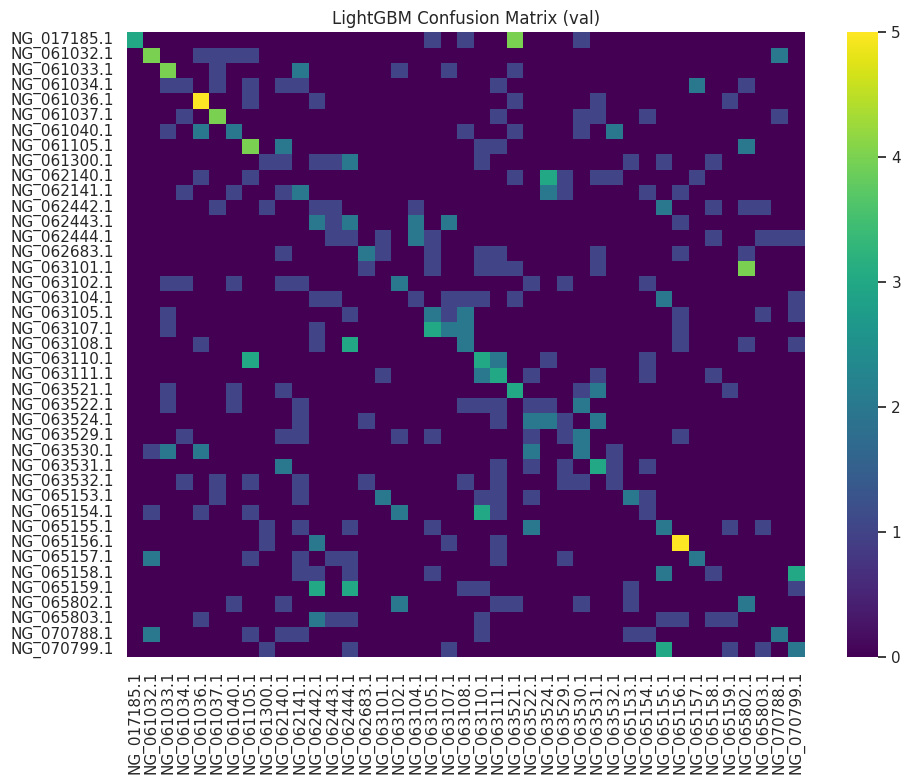

In [ ]:

import os, numpy as np, joblib, matplotlib.pyplot as plt, seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, top_k_accuracy_score, confusion_matrix
import lightgbm as lgb
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

sns.set(style="whitegrid")

X = np.load('/content/cnn_embeddings_clean.npy')
labels = np.load('/content/cleaned_labels.npy', allow_pickle=True)
print("Loaded embeddings:", X.shape, "labels:", labels.shape)

le = LabelEncoder()
y = le.fit_transform(labels)
n_classes = len(le.classes_)
print("Num classes:", n_classes)


freq = Counter(y)
class_counts = np.array([freq.get(i, 0) for i in range(n_classes)], dtype=np.float32)

class_counts[class_counts == 0] = 1.0
class_weights = class_counts.mean() / class_counts
class_weights = np.clip(class_weights, 1.0, class_weights.max())
print("Class weights (first 10):", class_weights[:10])

sample_weights = np.array([class_weights[int(label)] for label in y], dtype=np.float32)
sample_weights = sample_weights / np.mean(sample_weights)


X_train, X_val, y_train, y_val, w_train, w_val = train_test_split(
    X, y, sample_weights, test_size=0.20, stratify=y, random_state=42
)
print("Train/val shapes:", X_train.shape, X_val.shape)


lgb_train = lgb.Dataset(X_train, label=y_train, weight=w_train)
lgb_val = lgb.Dataset(X_val, label=y_val, weight=w_val, reference=lgb_train)

params = {
    'objective': 'multiclass',
    'num_class': n_classes,
    'learning_rate': 0.05,
    'num_leaves': 128,
    'metric': 'multi_logloss',
    'verbosity': -1,
    'n_jobs': -1,
    'seed': 42
}

print("Training weighted LightGBM...")
clf = None
try:
    callbacks = [lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=50)]
    clf = lgb.train(params, lgb_train, num_boost_round=1000, valid_sets=[lgb_val], callbacks=callbacks)
except Exception as e:
    print("LightGBM callbacks failed, falling back to simpler train:", e)
    clf = lgb.train(params, lgb_train, num_boost_round=500, valid_sets=[lgb_val])

best_it = getattr(clf, "best_iteration", None)
print("best_iteration:", best_it)


if best_it and best_it > 0:
    preds_proba = clf.predict(X_val, num_iteration=best_it)
else:
    preds_proba = clf.predict(X_val)
preds_labels = preds_proba.argmax(axis=1)

print("LightGBM Accuracy:", accuracy_score(y_val, preds_labels))
print("LightGBM Top-3 accuracy:", top_k_accuracy_score(y_val, preds_proba, k=3))
print("LightGBM classification report:")
print(classification_report(y_val, preds_labels, zero_division=0, target_names=[str(x) for x in le.classes_]))

cm = confusion_matrix(y_val, preds_labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap='viridis', xticklabels=le.classes_, yticklabels=le.classes_, fmt='d')
plt.title("LightGBM Confusion Matrix (val)")
plt.xticks(rotation=90); plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('/content/lgb_confusion_matrix.png', dpi=200)
print("Saved confusion matrix to /content/lgb_confusion_matrix.png")

joblib.dump(clf, '/content/lgb_model_weighted.pkl')
joblib.dump(le, '/content/label_encoder.pkl')
np.save('/content/class_weights.npy', class_weights)
print("Saved LightGBM model and label encoder")

print("Training small class-weighted MLP (few epochs)...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)

torch.save(scaler, '/content/mlp_input_scaler.pt')

train_ds = TensorDataset(torch.tensor(X_train_s, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
val_ds = TensorDataset(torch.tensor(X_val_s, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))
tr_dl = DataLoader(train_ds, batch_size=128, shuffle=True)
vl_dl = DataLoader(val_ds, batch_size=256, shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_dim, hidden=512, n_classes=10):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden, hidden//2),
            nn.ReLU(),
            nn.Linear(hidden//2, n_classes)
        )
    def forward(self,x): return self.net(x)

mlp = MLP(X.shape[1], hidden=512, n_classes=n_classes).to(device)


cw = torch.tensor(class_weights, dtype=torch.float32).to(device)
loss_fn = nn.CrossEntropyLoss(weight=cw)
opt = optim.Adam(mlp.parameters(), lr=1e-3)

best_val_acc = 0.0
for epoch in range(12):
    mlp.train()
    train_loss = 0.0
    for xb, yb in tr_dl:
        xb, yb = xb.to(device), yb.to(device)
        opt.zero_grad()
        out = mlp(xb)
        loss = loss_fn(out, yb)
        loss.backward()
        opt.step()
        train_loss += loss.item() * xb.size(0)
    train_loss /= len(train_ds)

    mlp.eval()
    preds = []; gts = []
    with torch.no_grad():
        for xb, yb in vl_dl:
            xb = xb.to(device)
            out = mlp(xb).cpu().numpy()
            preds.extend(out.argmax(axis=1).tolist())
            gts.extend(yb.numpy().tolist())
    val_acc = accuracy_score(gts, preds)
    print(f"Epoch {epoch+1:02d} | train_loss: {train_loss:.4f} | val_acc: {val_acc:.4f}")
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(mlp.state_dict(), '/content/mlp_weighted_best.pt')
print("Best MLP val acc:", best_val_acc)
torch.save(mlp.state_dict(), '/content/mlp_weighted_final.pt')
print("Saved MLP -> /content/mlp_weighted_final.pt")


mlp.load_state_dict(torch.load('/content/mlp_weighted_best.pt', map_location=device))
mlp.eval()
preds=[]; gts=[]
with torch.no_grad():
    for xb, yb in vl_dl:
        xb = xb.to(device); out = mlp(xb).cpu().numpy()
        preds.extend(out.argmax(axis=1).tolist()); gts.extend(yb.numpy().tolist())
print("MLP classification report:")
print(classification_report(gts, preds, zero_division=0, target_names=[str(x) for x in le.classes_]))

joblib.dump(le, '/content/label_encoder.pkl')
joblib.dump(class_weights, '/content/class_weights.pkl')
print("Saved label encoder and class weights.")


In [ ]:
# ===== Contrastive pretraining (SimCLR) for CNN encoder =====
# Paste entire cell and run. Adjust epochs/batch size if runtime limited.
import os, numpy as np, random, math, torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ---- load cleaned reads ----
reads_path = '/content/cleaned_read_records.npy'
assert os.path.exists(reads_path), "cleaned_read_records.npy not found. Run QC cell first."
reads = list(np.load(reads_path, allow_pickle=True))
N = len(reads)
print("Num cleaned reads:", N)

# ---- augmentations for DNA ----
def reverse_complement(seq):
    trans = str.maketrans("ACGTacgtNn", "TGCAtgcaNn")
    return seq.translate(trans)[::-1]

def random_substitute(seq, prob=0.03):
    # random substitution at each base with probability prob
    bases = ['A','C','G','T']
    s = list(seq)
    for i,ch in enumerate(s):
        if ch.upper() not in bases:
            continue
        if random.random() < prob:
            s[i] = random.choice(bases)
    return ''.join(s)

def random_crop(seq, min_len=100, max_len=300):
    L = len(seq)
    target = random.randint(min_len, min(max_len, L))
    if L <= target:
        return seq
    start = random.randint(0, L - target)
    return seq[start:start+target]

def augment(seq):
    # pipeline: crop -> maybe reverse complement -> substitution -> maybe small deletion
    s = random_crop(seq, min_len=120, max_len=300)
    if random.random() < 0.5:
        s = reverse_complement(s)
    s = random_substitute(s, prob=0.02 + 0.03*random.random())
    return s

# ---- one-hot encoder (same as used by CNN) ----
BASES = {'A':0,'C':1,'G':2,'T':3,'N':4}
def one_hot_encode(seq, max_len=300):
    arr = np.zeros((max_len, 5), dtype=np.float32)
    s = seq.upper()[:max_len]
    for i,ch in enumerate(s):
        idx = BASES.get(ch, 4)
        arr[i, idx] = 1.0
    return arr

# ---- Dataset that returns two augmented views ----
class TwoViewDNADataset(Dataset):
    def __init__(self, seqs):
        self.seqs = seqs
    def __len__(self):
        return len(self.seqs)
    def __getitem__(self, idx):
        s = self.seqs[idx]
        v1 = augment(s)
        v2 = augment(s)
        x1 = one_hot_encode(v1)
        x2 = one_hot_encode(v2)
        return x1, x2

# ---- encoder (recreate same SimpleDNACNN used earlier) ----
class SimpleDNACNN(nn.Module):
    def __init__(self, emb_dim=256):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(5, 128, kernel_size=9, padding=4),
            nn.ReLU(),
            nn.MaxPool1d(4),
            nn.Conv1d(128, 256, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )
        self.fc = nn.Linear(256, emb_dim)
    def forward(self, x):  # x shape (B, L, 5)
        x = x.permute(0,2,1)  # -> (B, 5, L)
        x = self.conv(x)      # -> (B, 256, 1)
        x = x.view(x.size(0), -1)
        return self.fc(x)

# ---- projection head ----
class ProjectionHead(nn.Module):
    def __init__(self, in_dim=256, proj_dim=128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, in_dim),
            nn.ReLU(),
            nn.Linear(in_dim, proj_dim)
        )
    def forward(self,x):
        return self.net(x)

# ---- loss (NT-Xent) ----
def nt_xent_loss(z1, z2, temperature=0.1, eps=1e-8):
    # z1,z2 normalized embeddings (B, D)
    B = z1.size(0)
    z = torch.cat([z1, z2], dim=0)  # 2B x D
    z = nn.functional.normalize(z, dim=1)
    sim = torch.matmul(z, z.T)  # 2B x 2B
    sim /= temperature
    # mask out self-similarities
    mask = (~torch.eye(2*B, dtype=torch.bool, device=sim.device)).float()
    exp_sim = torch.exp(sim) * mask
    # positive indices: i -> i+B (and i+B -> i)
    pos_idx = torch.arange(B, device=sim.device)
    pos = torch.cat([pos_idx + B, pos_idx])  # 2B
    pos_sim = torch.exp(sim[torch.arange(2*B, device=sim.device), pos])
    denom = exp_sim.sum(dim=1) + eps
    loss = -torch.log(pos_sim / denom)
    return loss.mean()

# ---- instantiate ----
emb_dim = 256
proj_dim = 128
encoder = SimpleDNACNN(emb_dim=emb_dim).to(device)
proj_head = ProjectionHead(in_dim=emb_dim, proj_dim=proj_dim).to(device)

# If you have previous encoder weights, load them first (optional)
pretrained_path = '/content/encoder_simclr.pt'
if os.path.exists(pretrained_path):
    try:
        encoder.load_state_dict(torch.load(pretrained_path, map_location=device))
        print("Loaded existing encoder weights (encoder_simclr.pt)")
    except Exception as e:
        print("Could not load previous encoder:", e)

# ---- dataloader ----
batch_size = 128
dataset = TwoViewDNADataset(reads)
dl = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)

# ---- optimizer / training ----
opt = optim.AdamW(list(encoder.parameters()) + list(proj_head.parameters()), lr=1e-3, weight_decay=1e-4)
epochs = 20
print("Starting SimCLR training epochs:", epochs, "bsize:", batch_size)

for epoch in range(1, epochs+1):
    encoder.train(); proj_head.train()
    total_loss = 0.0; cnt = 0
    for x1, x2 in dl:
        x1 = torch.tensor(x1, dtype=torch.float32).to(device)
        x2 = torch.tensor(x2, dtype=torch.float32).to(device)
        opt.zero_grad()
        h1 = encoder(x1); h2 = encoder(x2)
        z1 = proj_head(h1); z2 = proj_head(h2)
        loss = nt_xent_loss(z1, z2, temperature=0.1)
        loss.backward()
        opt.step()
        total_loss += loss.item() * x1.size(0)
        cnt += x1.size(0)
    avg = total_loss / cnt
    print(f"Epoch {epoch:02d} | SimCLR loss: {avg:.5f}")

# ---- save encoder/projection head ----
torch.save(encoder.state_dict(), '/content/encoder_simclr.pt')
torch.save(proj_head.state_dict(), '/content/proj_head_simclr.pt')
print("Saved encoder -> /content/encoder_simclr.pt and proj head -> /content/proj_head_simclr.pt")


Device: cuda
Num cleaned reads: 2050
Starting SimCLR training epochs: 20 bsize: 128


/tmp/ipython-input-2456510535.py:150: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x1 = torch.tensor(x1, dtype=torch.float32).to(device)
/tmp/ipython-input-2456510535.py:151: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x2 = torch.tensor(x2, dtype=torch.float32).to(device)


Epoch 01 | SimCLR loss: 5.23465
Epoch 02 | SimCLR loss: 4.66830
Epoch 03 | SimCLR loss: 4.48975
Epoch 04 | SimCLR loss: 4.47644
Epoch 05 | SimCLR loss: 4.48604
Epoch 06 | SimCLR loss: 4.41160
Epoch 07 | SimCLR loss: 4.41320
Epoch 08 | SimCLR loss: 4.37043
Epoch 09 | SimCLR loss: 4.33993
Epoch 10 | SimCLR loss: 4.28030
Epoch 11 | SimCLR loss: 4.25540
Epoch 12 | SimCLR loss: 4.35332
Epoch 13 | SimCLR loss: 4.19566
Epoch 14 | SimCLR loss: 3.95294
Epoch 15 | SimCLR loss: 3.77444
Epoch 16 | SimCLR loss: 3.63394
Epoch 17 | SimCLR loss: 3.48014
Epoch 18 | SimCLR loss: 3.77508
Epoch 19 | SimCLR loss: 3.36617
Epoch 20 | SimCLR loss: 3.09789
Saved encoder -> /content/encoder_simclr.pt and proj head -> /content/proj_head_simclr.pt


In [ ]:
# ===== Fine-tune encoder + class-weighted classifier =====
import os, numpy as np, torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, top_k_accuracy_score, classification_report
import joblib

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# load cleaned reads and labels
reads = list(np.load('/content/cleaned_read_records.npy', allow_pickle=True))
labels = list(np.load('/content/cleaned_labels.npy', allow_pickle=True))
N = len(reads)
print("Num cleaned reads:", N)

# label encoding (reuse if saved)
le_path = '/content/label_encoder.pkl'
if os.path.exists(le_path):
    le = joblib.load(le_path)
else:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder().fit(labels)
    joblib.dump(le, le_path)
y = le.transform(labels)
n_classes = len(le.classes_)
print("Num classes:", n_classes)

# dataset yields one-hot + label
BASES = {'A':0,'C':1,'G':2,'T':3,'N':4}
def one_hot_encode(seq, max_len=300):
    arr = np.zeros((max_len, 5), dtype=np.float32)
    s = seq.upper()[:max_len]
    for i,ch in enumerate(s):
        arr[i, BASES.get(ch, 4)] = 1.0
    return arr

class SeqLabelDataset(Dataset):
    def __init__(self, seqs, lbls):
        self.seqs = seqs
        self.lbls = lbls
    def __len__(self): return len(self.seqs)
    def __getitem__(self, idx):
        return one_hot_encode(self.seqs[idx]), int(self.lbls[idx])

# split train/val indices (stratified)
from sklearn.model_selection import train_test_split
idxs = np.arange(N)
tr_idx, val_idx = train_test_split(idxs, test_size=0.2, stratify=y, random_state=42)
train_ds = SeqLabelDataset([reads[i] for i in tr_idx], y[tr_idx])
val_ds = SeqLabelDataset([reads[i] for i in val_idx], y[val_idx])
tr_dl = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)
vl_dl = DataLoader(val_ds, batch_size=128, shuffle=False, num_workers=2, pin_memory=True)

# instantiate encoder and load contrastive weights
class SimpleDNACNN(nn.Module):
    def __init__(self, emb_dim=256):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(5, 128, kernel_size=9, padding=4),
            nn.ReLU(),
            nn.MaxPool1d(4),
            nn.Conv1d(128, 256, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )
        self.fc = nn.Linear(256, emb_dim)
    def forward(self, x):
        x = x.permute(0,2,1)
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

encoder = SimpleDNACNN(emb_dim=256).to(device)
enc_path = '/content/encoder_simclr.pt'
if os.path.exists(enc_path):
    encoder.load_state_dict(torch.load(enc_path, map_location=device))
    print("Loaded encoder weights from", enc_path)
else:
    print("No simclr encoder found; training will start from scratch.")

# classifier head
class ClassifierHead(nn.Module):
    def __init__(self, in_dim=256, hidden=512, n_classes=10):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden, hidden//2),
            nn.ReLU(),
            nn.Linear(hidden//2, n_classes)
        )
    def forward(self, x): return self.net(x)

head = ClassifierHead(in_dim=256, hidden=512, n_classes=n_classes).to(device)

# class weights (inverse freq)
from collections import Counter
freq = Counter(y)
class_counts = np.array([freq.get(i, 0) for i in range(n_classes)], dtype=np.float32)
class_counts[class_counts==0] = 1.0
class_weights = class_counts.mean() / class_counts
class_weights = np.clip(class_weights, 1.0, class_weights.max())
cw = torch.tensor(class_weights, dtype=torch.float32).to(device)
loss_fn = nn.CrossEntropyLoss(weight=cw)

# ---- Phase 1: Freeze encoder, train head ----
for p in encoder.parameters(): p.requires_grad = False
opt = optim.Adam(head.parameters(), lr=1e-3)
best_val = 0.0
for epoch in range(6):  # short head-only warmup
    head.train(); total=0.0; cnt=0
    for xb, yb in tr_dl:
        xb = xb.to(device); yb = yb.to(device)
        emb = encoder(xb)
        logits = head(emb)
        loss = loss_fn(logits, yb)
        opt.zero_grad(); loss.backward(); opt.step()
        total += loss.item()*xb.size(0); cnt += xb.size(0)
    # eval
    head.eval(); preds=[]; gts=[]
    with torch.no_grad():
        for xb,yb in vl_dl:
            xb = xb.to(device)
            out = head(encoder(xb)).cpu().numpy()
            preds.extend(out.argmax(axis=1)); gts.extend(yb.numpy())
    val_acc = accuracy_score(gts, preds)
    print(f"Head Epoch {epoch+1} | val_acc: {val_acc:.4f}")
    if val_acc > best_val:
        best_val = val_acc
        torch.save(head.state_dict(), '/content/head_warmup.pt')

# ---- Phase 2: Unfreeze encoder last block & fine-tune end-to-end ----
# Option: unfreeze all or only last conv layer; here we unfreeze all for simplicity with low LR
for p in encoder.parameters(): p.requires_grad = True
params = list(encoder.parameters()) + list(head.parameters())
opt = optim.AdamW(params, lr=2e-4, weight_decay=1e-5)

best_val = 0.0
for epoch in range(12):
    encoder.train(); head.train()
    total=0.0; cnt=0
    for xb,yb in tr_dl:
        xb = xb.to(device); yb = yb.to(device)
        emb = encoder(xb)
        logits = head(emb)
        loss = loss_fn(logits, yb)
        opt.zero_grad(); loss.backward(); opt.step()
        total += loss.item()*xb.size(0); cnt += xb.size(0)
    # eval
    encoder.eval(); head.eval()
    preds=[]; gts=[]; probs=[]
    with torch.no_grad():
        for xb,yb in vl_dl:
            xb = xb.to(device)
            out = head(encoder(xb)).cpu().numpy()
            preds.extend(out.argmax(axis=1)); probs.extend(out)
            gts.extend(yb.numpy())
    val_acc = accuracy_score(gts, preds)
    top3 = top_k_accuracy_score(gts, np.array(probs), k=3)
    print(f"Fine-tune Epoch {epoch+1} | val_acc: {val_acc:.4f} | top-3: {top3:.4f}")
    if val_acc > best_val:
        best_val = val_acc
        torch.save(encoder.state_dict(), '/content/encoder_finetuned.pt')
        torch.save(head.state_dict(), '/content/head_finetuned.pt')

print("Finished fine-tuning. Best val acc:", best_val)
# Final classification report
from sklearn.metrics import classification_report
encoder.load_state_dict(torch.load('/content/encoder_finetuned.pt', map_location=device))
head.load_state_dict(torch.load('/content/head_finetuned.pt', map_location=device))
encoder.eval(); head.eval()
preds=[]; gts=[]
with torch.no_grad():
    for xb,yb in vl_dl:
        xb = xb.to(device)
        out = head(encoder(xb)).cpu().numpy()
        preds.extend(out.argmax(axis=1)); gts.extend(yb.numpy())
print("Final classification report:")
print(classification_report(gts, preds, zero_division=0, target_names=[str(x) for x in le.classes_]))

# save artifacts
torch.save(encoder.state_dict(), '/content/encoder_final.pt')
torch.save(head.state_dict(), '/content/head_final.pt')
print("Saved encoder_final.pt and head_final.pt")


Device: cuda
Num cleaned reads: 2050
Num classes: 41
Loaded encoder weights from /content/encoder_simclr.pt
Head Epoch 1 | val_acc: 0.0293
Head Epoch 2 | val_acc: 0.0293
Head Epoch 3 | val_acc: 0.0244
Head Epoch 4 | val_acc: 0.0293
Head Epoch 5 | val_acc: 0.0390
Head Epoch 6 | val_acc: 0.0293
Fine-tune Epoch 1 | val_acc: 0.0341 | top-3: 0.0951
Fine-tune Epoch 2 | val_acc: 0.0317 | top-3: 0.1024
Fine-tune Epoch 3 | val_acc: 0.0268 | top-3: 0.0854
Fine-tune Epoch 4 | val_acc: 0.0341 | top-3: 0.1024
Fine-tune Epoch 5 | val_acc: 0.0390 | top-3: 0.0951
Fine-tune Epoch 6 | val_acc: 0.0415 | top-3: 0.0878
Fine-tune Epoch 7 | val_acc: 0.0415 | top-3: 0.0976
Fine-tune Epoch 8 | val_acc: 0.0390 | top-3: 0.1000
Fine-tune Epoch 9 | val_acc: 0.0439 | top-3: 0.1195
Fine-tune Epoch 10 | val_acc: 0.0488 | top-3: 0.1122
Fine-tune Epoch 11 | val_acc: 0.0439 | top-3: 0.1244
Fine-tune Epoch 12 | val_acc: 0.0341 | top-3: 0.1293
Finished fine-tuning. Best val acc: 0.04878048780487805
Final classification re

In [ ]:
# Paste & run this ENTIRE cell in Colab.
# It will regenerate X_full.npy if missing and then run the full robust stacked ensemble.

# Installs
!pip install -q xgboost lightgbm joblib tqdm

# ---------- imports & seeds ----------
import os, time, traceback, random
import numpy as np, pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, top_k_accuracy_score
import joblib
import xgboost as xgb
import lightgbm as lgb

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

print("XGBoost:", xgb.__version__, "LightGBM:", lgb.__version__)

# ---------- file paths ----------
reads_path = '/content/cleaned_read_records.npy'
labels_path = '/content/cleaned_labels.npy'
emb_path = '/content/encoder_embeddings.npy'
encoder_path = '/content/encoder_final.pt'
k3_path = '/content/kmer3.npy'
k4_path = '/content/kmer4.npy'
scalars_path = '/content/scalar_feats.npy'
X_full_path = '/content/X_full.npy'

# ---------- helper funcs for features/embeddings ----------
def one_hot_encode(seq, max_len=300):
    BASES = {'A':0,'C':1,'G':2,'T':3,'N':4}
    arr = np.zeros((max_len,5), dtype=np.float32)
    s = seq.upper()[:max_len]
    for i,ch in enumerate(s):
        arr[i, BASES.get(ch,4)] = 1.0
    return arr

def gc_content(seq):
    s = seq.upper()
    return (s.count('G') + s.count('C')) / max(1, len(s))
def pct_N(seq):
    return seq.upper().count('N') / max(1, len(seq))
def max_homopolymer(seq):
    maxlen = cur = 1
    s = seq.upper()
    for i in range(1,len(s)):
        if s[i] == s[i-1]:
            cur += 1
        else:
            if cur > maxlen: maxlen = cur
            cur = 1
    return max(maxlen, cur)
from collections import Counter as _Counter
def kmer_entropy(seq, k=4):
    s = seq.upper()
    if len(s) < k: return 0.0
    freqs = _Counter()
    total = 0
    for i in range(len(s)-k+1):
        kmer = s[i:i+k]
        if 'N' in kmer: continue
        freqs[kmer]+=1; total+=1
    if total == 0: return 0.0
    probs = np.array(list(freqs.values()), dtype=float)/total
    return float(-(probs*np.log2(probs+1e-12)).sum())

# k-mer freq vector (k=3,4)
def kmer_freq_vector(seq, k):
    mapping = {'A':0,'C':1,'G':2,'T':3}
    vocab_size = 4**k
    vec = np.zeros(vocab_size, dtype=np.float32)
    s = seq.upper()
    for i in range(len(s)-k+1):
        kmer = s[i:i+k]
        if any(ch not in mapping for ch in kmer): continue
        idx = 0
        for ch in kmer:
            idx = (idx << 2) | mapping[ch]
        vec[idx] += 1.0
    total = vec.sum()
    if total > 0: vec /= total
    return vec

# ---------- step A: ensure reads & labels exist ----------
if not os.path.exists(reads_path):
    raise FileNotFoundError(f"{reads_path} not found. Run QC step to create cleaned_read_records.npy first.")
if not os.path.exists(labels_path):
    raise FileNotFoundError(f"{labels_path} not found. Create cleaned_labels.npy aligned with reads.")

reads = list(np.load(reads_path, allow_pickle=True))
labels = list(np.load(labels_path, allow_pickle=True))
N = len(reads)
print("Loaded reads:", N, "labels:", len(labels))
assert len(labels) == N, "Mismatch between reads and labels length."

# ---------- step B: make embeddings if needed ----------
if not os.path.exists(emb_path):
    print("No precomputed encoder embeddings found at", emb_path)
    # require encoder weights to compute embeddings
    if not os.path.exists(encoder_path):
        print("Encoder weights not found at", encoder_path)
        print("-> You must provide '/content/encoder_final.pt' or a pretrained encoder to compute embeddings.")
        raise FileNotFoundError("Missing encoder_final.pt; cannot compute embeddings.")
    # create SimpleDNACNN and load weights, then embed
    import torch, torch.nn as nn
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    class SimpleDNACNN(nn.Module):
        def __init__(self, emb_dim=256):
            super().__init__()
            self.conv = nn.Sequential(
                nn.Conv1d(5, 128, kernel_size=9, padding=4),
                nn.ReLU(),
                nn.MaxPool1d(4),
                nn.Conv1d(128, 256, kernel_size=7, padding=3),
                nn.ReLU(),
                nn.AdaptiveAvgPool1d(1)
            )
            self.fc = nn.Linear(256, emb_dim)
        def forward(self, x):
            x = x.permute(0,2,1)
            x = self.conv(x)
            x = x.view(x.size(0), -1)
            return self.fc(x)
    model = SimpleDNACNN(emb_dim=256).to(device)
    try:
        model.load_state_dict(torch.load(encoder_path, map_location=device))
        print("Loaded encoder weights from", encoder_path)
    except Exception as e:
        print("Failed to load encoder weights:", e)
        raise
    model.eval()
    batch = 256
    embs = np.zeros((N, 256), dtype=np.float32)
    with torch.no_grad():
        for i in range(0, N, batch):
            batch_seqs = reads[i:i+batch]
            X = np.stack([one_hot_encode(s, max_len=300) for s in batch_seqs]).astype(np.float32)
            X_t = torch.tensor(X).to(device)
            out = model(X_t).cpu().numpy()
            embs[i:i+out.shape[0]] = out
            if (i // batch) % 5 == 0:
                print("Embedded", i, "/", N)
    np.save(emb_path, embs)
    print("Saved embeddings to", emb_path)
else:
    print("Loading existing embeddings from", emb_path)
    embs = np.load(emb_path, mmap_mode='r')
    # materialize into memory (safe for N~2k)
    embs = np.array(embs)
print("Embeddings shape:", embs.shape)

# ---------- step C: compute k-mer & scalar features if missing ----------
# compute or load k3,k4,scalars
if os.path.exists(k3_path) and os.path.exists(k4_path) and os.path.exists(scalars_path):
    print("Loading existing k-mer & scalar feature files.")
    k3 = np.load(k3_path, mmap_mode='r'); k4 = np.load(k4_path, mmap_mode='r'); scalars = np.load(scalars_path, mmap_mode='r')
    k3 = np.array(k3); k4 = np.array(k4); scalars = np.array(scalars)
else:
    print("Computing k-mer and scalar features (this may take a minute)...")
    k3 = np.zeros((N, 4**3), dtype=np.float32)
    k4 = np.zeros((N, 4**4), dtype=np.float32)
    scalars = np.zeros((N, 6), dtype=np.float32)  # len, gc, pctN, max_homo, entropy4, reserved
    for i, s in enumerate(reads):
        scalars[i,0] = len(s)
        scalars[i,1] = gc_content(s)
        scalars[i,2] = pct_N(s)
        scalars[i,3] = max_homopolymer(s)
        scalars[i,4] = kmer_entropy(s, k=4)
        # fill k-mer vectors
        k3[i,:] = kmer_freq_vector(s, 3)
        k4[i,:] = kmer_freq_vector(s, 4)
        if i % 500 == 0:
            print("Featured", i, "/", N)
    np.save(k3_path, k3); np.save(k4_path, k4); np.save(scalars_path, scalars)
    print("Saved k3, k4 and scalar features.")

print("k3/k4/scalars shapes:", k3.shape, k4.shape, scalars.shape)

# ---------- step D: construct X_full if missing ----------
if not os.path.exists(X_full_path):
    print("Constructing X_full by concatenating embeddings+kmer+scalars ...")
    # ensure embs, k3, k4, scalars align
    assert embs.shape[0] == k3.shape[0] == k4.shape[0] == scalars.shape[0] == N
    X_full = np.hstack([embs, k3, k4, scalars])
    np.save(X_full_path, X_full)
    print("Saved", X_full_path, "shape:", X_full.shape)
else:
    print("Loading existing X_full:", X_full_path)
    X_full = np.load(X_full_path, mmap_mode='r')
    X_full = np.array(X_full)  # materialize
print("Final X_full shape:", X_full.shape)

# ---------- step E: stacking ensemble training (5-fold) ----------
print("\nStarting 5-fold stacked ensemble training ...")
X = X_full
labels = list(np.load(labels_path, allow_pickle=True))
le = LabelEncoder(); y = le.fit_transform(labels)
n_classes = len(le.classes_)
print("n_classes:", n_classes)

# sample weights inverse freq
freq = Counter(y)
class_counts = np.array([freq.get(i, 0) for i in range(n_classes)], dtype=float)
class_counts[class_counts==0] = 1.0
class_weights = class_counts.mean()/class_counts
sample_w = np.array([class_weights[int(lbl)] for lbl in y], dtype=float)
sample_w = sample_w / sample_w.mean()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
oof_probs_lgb = np.zeros((N, n_classes), dtype=float)
oof_probs_xgb = np.zeros((N, n_classes), dtype=float)
lgb_models = []; xgb_models = []
fold = 0

for tr_idx, val_idx in skf.split(X, y):
    fold += 1
    print(f"\n=== Fold {fold} ===")
    X_tr = np.array(X[tr_idx]); X_val = np.array(X[val_idx])
    y_tr, y_val = y[tr_idx], y[val_idx]
    w_tr, w_val = sample_w[tr_idx], sample_w[val_idx]

    # LightGBM
    try:
        lgb_train = lgb.Dataset(X_tr, label=y_tr, weight=w_tr)
        lgb_val = lgb.Dataset(X_val, label=y_val, weight=w_val, reference=lgb_train)
        lgb_params = {
            'objective': 'multiclass',
            'num_class': n_classes,
            'learning_rate': 0.05,
            'num_leaves': 128,
            'metric': 'multi_logloss',
            'verbosity': -1,
            'seed': SEED,
            'n_jobs': -1
        }
        clf_lgb = None
        try:
            clf_lgb = lgb.train(lgb_params, lgb_train, num_boost_round=800, valid_sets=[lgb_val],
                                callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=100)])
        except Exception as e_cb:
            print("LightGBM callback failed:", e_cb, "-- falling back to simpler train")
            clf_lgb = lgb.train(lgb_params, lgb_train, num_boost_round=500, valid_sets=[lgb_val])
        best_it = getattr(clf_lgb, "best_iteration", None)
        if best_it and best_it > 0:
            p_val_lgb = clf_lgb.predict(X_val, num_iteration=best_it)
        else:
            p_val_lgb = clf_lgb.predict(X_val)
        oof_probs_lgb[val_idx] = p_val_lgb
        lgb_models.append(clf_lgb)
        print("LGB val acc:", accuracy_score(y_val, p_val_lgb.argmax(axis=1)))
    except Exception:
        print("LightGBM training error on fold", fold)
        traceback.print_exc()
        raise

    # XGBoost
    try:
        dtrain = xgb.DMatrix(X_tr, label=y_tr, weight=w_tr)
        dval = xgb.DMatrix(X_val, label=y_val, weight=w_val)
        xgb_params = {
            'objective': 'multi:softprob',
            'num_class': n_classes,
            'eta': 0.05,
            'max_depth': 8,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'verbosity': 0,
            'seed': SEED
        }
        bst = xgb.train(xgb_params, dtrain, num_boost_round=800, evals=[(dval,'eval')],
                        early_stopping_rounds=50, verbose_eval=100)
        best_it = None
        if hasattr(bst, 'best_iteration') and bst.best_iteration is not None:
            best_it = int(bst.best_iteration)
        elif hasattr(bst, 'best_ntree_limit') and bst.best_ntree_limit is not None:
            best_it = int(bst.best_ntree_limit)
        try:
            if best_it is not None:
                p_val_xgb = bst.predict(dval, iteration_range=(0, best_it+1))
            else:
                p_val_xgb = bst.predict(dval)
        except TypeError:
            try:
                p_val_xgb = bst.predict(dval, ntree_limit=best_it)
            except Exception:
                p_val_xgb = bst.predict(dval)
        oof_probs_xgb[val_idx] = p_val_xgb
        xgb_models.append(bst)
        print("XGB val acc:", accuracy_score(y_val, p_val_xgb.argmax(axis=1)))
    except Exception:
        print("XGBoost training error on fold", fold)
        traceback.print_exc()
        raise

# save base models
joblib.dump(lgb_models, '/content/lgb_models_list.pkl')
joblib.dump(xgb_models, '/content/xgb_models_list.pkl')
print("Saved base model lists.")

# ---------- meta-model ----------
meta_X = np.hstack([oof_probs_lgb, oof_probs_xgb])
print("meta_X shape:", meta_X.shape)
meta_clf = LogisticRegression(max_iter=3000, multi_class='multinomial', solver='lbfgs')
meta_clf.fit(meta_X, y)
oof_meta_preds = meta_clf.predict(meta_X)
print("Stacked OOF accuracy:", accuracy_score(y, oof_meta_preds))
print("Stacked OOF macro F1:", f1_score(y, oof_meta_preds, average='macro'))
try:
    print("Stacked OOF top-3:", top_k_accuracy_score(y, meta_clf.predict_proba(meta_X), k=3))
except Exception:
    pass

joblib.dump(meta_clf, '/content/stack_meta_clf.pkl')
joblib.dump(le, '/content/label_encoder_stack.pkl')
print("Saved meta classifier and label encoder.")

# ---------- final report ----------
print("\nFinal classification report (stack OOF):")
print(classification_report(y, oof_meta_preds, zero_division=0, target_names=list(le.classes_)))

oof_df = pd.DataFrame({
    'idx': np.arange(N),
    'true_label': [le.classes_[lab] for lab in y],
    'pred_label': [le.classes_[lab] for lab in oof_meta_preds],
    'pred_conf': meta_clf.predict_proba(meta_X).max(axis=1)
})
oof_df.to_csv('/content/stack_oof_predictions.csv', index=False)
print("Saved /content/stack_oof_predictions.csv")

print("\nAll done. Artifacts:")
print(" - /content/lgb_models_list.pkl")
print(" - /content/xgb_models_list.pkl")
print(" - /content/stack_meta_clf.pkl")
print(" - /content/stack_oof_predictions.csv")


XGBoost: 3.0.4 LightGBM: 4.6.0
Loaded reads: 2050 labels: 2050
No precomputed encoder embeddings found at /content/encoder_embeddings.npy
Loaded encoder weights from /content/encoder_final.pt
Embedded 0 / 2050
Embedded 1280 / 2050
Saved embeddings to /content/encoder_embeddings.npy
Embeddings shape: (2050, 256)
Computing k-mer and scalar features (this may take a minute)...
Featured 0 / 2050
Featured 500 / 2050
Featured 1000 / 2050
Featured 1500 / 2050
Featured 2000 / 2050
Saved k3, k4 and scalar features.
k3/k4/scalars shapes: (2050, 64) (2050, 256) (2050, 6)
Constructing X_full by concatenating embeddings+kmer+scalars ...
Saved /content/X_full.npy shape: (2050, 582)
Final X_full shape: (2050, 582)

Starting 5-fold stacked ensemble training ...
n_classes: 41

=== Fold 1 ===
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 2.44713
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 2.21662
LGB val acc: 0.4609756097560976
[0]	eval-

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Stacked OOF accuracy: 0.49853658536585366
Stacked OOF macro F1: 0.5003053517002988
Stacked OOF top-3: 0.7463414634146341
Saved meta classifier and label encoder.

Final classification report (stack OOF):
              precision    recall  f1-score   support

 NG_017185.1       0.98      0.80      0.88        50
 NG_061032.1       0.70      0.64      0.67        50
 NG_061033.1       0.78      0.84      0.81        50
 NG_061034.1       0.57      0.56      0.57        50
 NG_061036.1       0.48      0.48      0.48        50
 NG_061037.1       0.80      0.78      0.79        50
 NG_061040.1       0.45      0.44      0.44        50
 NG_061105.1       0.73      0.70      0.71        50
 NG_061300.1       0.14      0.10      0.12        50
 NG_062140.1       0.58      0.56      0.57        50
 NG_062141.1       0.60      0.70      0.65        50
 NG_062442.1       0.43      0.46      0.45        50
 NG_062443.1       0.30      0.32      0.31        50
 NG_062444.1       0.36      0.40      

In [ ]:
# Install required packages (idempotent)
!pip install -q xgboost lightgbm joblib tqdm


In [ ]:
# Config: change these to scale model up/down
K = 6                    # k-mer size for tokenization (6 is powerful)
MAX_TOKENS = 256         # max number of k-mers tokens per sample (incl. CLS). tradeoff between context & memory
MASK_PROB = 0.15         # MLM mask probability
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

# Load cleaned reads/labels
reads = list(np.load('/content/cleaned_read_records.npy', allow_pickle=True))
labels = list(np.load('/content/cleaned_labels.npy', allow_pickle=True))
N = len(reads)
print("Loaded reads:", N, "labels:", len(labels))

# Build complete k-mer vocabulary (4^K)
# We'll generate mapping for all possible k-mers over A/C/G/T
from itertools import product
alphabet = ['A','C','G','T']
kmers_list = [''.join(p) for p in product(alphabet, repeat=K)]
vocab = {kmer:i for i,kmer in enumerate(kmers_list)}
vocab_size = len(vocab)
print("K-mer vocab (k=%d) size:"%K, vocab_size)

# Special tokens
PAD = vocab_size
CLS = vocab_size + 1
MASK = vocab_size + 2
UNK = vocab_size + 3
SPECIAL_TOKS = {'PAD':PAD, 'CLS':CLS, 'MASK':MASK, 'UNK':UNK}
TOTAL_VOCAB = vocab_size + len(SPECIAL_TOKS)
print("Total vocab (with special):", TOTAL_VOCAB, SPECIAL_TOKS)

# Tokenizer: sliding k-mers; random crop to max tokens during training
def kmers_from_seq(seq, k=K):
    s = seq.upper()
    L = len(s)
    km = []
    for i in range(0, max(1, L - k + 1)):
        kmer = s[i:i+k]
        # if contains unknown chars (like N), map to UNK
        if any(ch not in alphabet for ch in kmer):
            km.append('UNK')
        else:
            km.append(kmer)
    return km

def tokens_from_seq(seq, k=K, max_tokens=MAX_TOKENS, training=True):
    km = kmers_from_seq(seq,k)
    if training and len(km) > max_tokens - 1:  # keep space for CLS
        # random contiguous crop
        start = random.randint(0, len(km) - (max_tokens - 1))
        km = km[start:start + (max_tokens - 1)]
    else:
        km = km[:max_tokens-1]
    # map to ids
    ids = [CLS]
    for kmer in km:
        if kmer == 'UNK':
            ids.append(UNK)
        else:
            ids.append(vocab.get(kmer, UNK))
    # pad
    while len(ids) < max_tokens:
        ids.append(PAD)
    return ids  # length == max_tokens

# Masking function for MLM: returns input_ids, labels (labels are -100 for non-masked)
import numpy as np
def mask_inputs(input_ids, mask_token=MASK, pad_token=PAD, mask_prob=MASK_PROB, vocab_size_local=vocab_size):
    input_ids = np.array(input_ids, copy=True)
    labels = np.full_like(input_ids, fill_value=-100)  # -100 ignored by CE
    # do not mask special positions (CLS, PAD), mask only token positions >0 and !=PAD
    candidate_pos = np.where((input_ids != PAD) & (input_ids != CLS))[0]
    num_to_mask = max(1, int(round(len(candidate_pos) * mask_prob)))
    mask_pos = np.random.choice(candidate_pos, size=num_to_mask, replace=False)
    for p in mask_pos:
        orig = input_ids[p]
        labels[p] = orig
        r = random.random()
        if r < 0.8:
            input_ids[p] = mask_token
        elif r < 0.9:
            # random token (not PAD)
            input_ids[p] = random.randint(0, vocab_size_local-1)
        else:
            # keep original
            input_ids[p] = orig
    return input_ids.astype(np.int64), labels.astype(np.int64)

# PyTorch datasets
from torch.utils.data import Dataset
class MLMDataset(Dataset):
    def __init__(self, seqs, training=True):
        self.seqs = seqs
        self.training = training
    def __len__(self):
        return len(self.seqs)
    def __getitem__(self, idx):
        ids = tokens_from_seq(self.seqs[idx], training=self.training)
        input_ids, labels = mask_inputs(ids)
        return {'input_ids': input_ids, 'labels': labels}

class ClassificationDataset(Dataset):
    def __init__(self, seqs, labels):
        self.seqs = seqs
        self.labels = labels
    def __len__(self):
        return len(self.seqs)
    def __getitem__(self, idx):
        ids = tokens_from_seq(self.seqs[idx], training=False)
        return {'input_ids': np.array(ids, dtype=np.int64), 'label': int(self.labels[idx])}


Loaded reads: 2050 labels: 2050
K-mer vocab (k=6) size: 4096
Total vocab (with special): 4100 {'PAD': 4096, 'CLS': 4097, 'MASK': 4098, 'UNK': 4099}


In [ ]:
# Paste & run this ENTIRE cell in Colab.
# It will regenerate X_full.npy if missing and then run the full robust stacked ensemble.

# Installs
!pip install -q xgboost lightgbm joblib tqdm

# ---------- imports & seeds ----------
import os, time, traceback, random
import numpy as np, pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, top_k_accuracy_score
import joblib
import xgboost as xgb
import lightgbm as lgb

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

print("XGBoost:", xgb.__version__, "LightGBM:", lgb.__version__)

# ---------- file paths ----------
reads_path = '/content/cleaned_read_records.npy'
labels_path = '/content/cleaned_labels.npy'
emb_path = '/content/encoder_embeddings.npy'
encoder_path = '/content/encoder_final.pt'
k3_path = '/content/kmer3.npy'
k4_path = '/content/kmer4.npy'
scalars_path = '/content/scalar_feats.npy'
X_full_path = '/content/X_full.npy'

# ---------- helper funcs for features/embeddings ----------
def one_hot_encode(seq, max_len=300):
    BASES = {'A':0,'C':1,'G':2,'T':3,'N':4}
    arr = np.zeros((max_len,5), dtype=np.float32)
    s = seq.upper()[:max_len]
    for i,ch in enumerate(s):
        arr[i, BASES.get(ch,4)] = 1.0
    return arr

def gc_content(seq):
    s = seq.upper()
    return (s.count('G') + s.count('C')) / max(1, len(s))
def pct_N(seq):
    return seq.upper().count('N') / max(1, len(seq))
def max_homopolymer(seq):
    maxlen = cur = 1
    s = seq.upper()
    for i in range(1,len(s)):
        if s[i] == s[i-1]:
            cur += 1
        else:
            if cur > maxlen: maxlen = cur
            cur = 1
    return max(maxlen, cur)
from collections import Counter as _Counter
def kmer_entropy(seq, k=4):
    s = seq.upper()
    if len(s) < k: return 0.0
    freqs = _Counter()
    total = 0
    for i in range(len(s)-k+1):
        kmer = s[i:i+k]
        if 'N' in kmer: continue
        freqs[kmer]+=1; total+=1
    if total == 0: return 0.0
    probs = np.array(list(freqs.values()), dtype=float)/total
    return float(-(probs*np.log2(probs+1e-12)).sum())

# k-mer freq vector (k=3,4)
def kmer_freq_vector(seq, k):
    mapping = {'A':0,'C':1,'G':2,'T':3}
    vocab_size = 4**k
    vec = np.zeros(vocab_size, dtype=np.float32)
    s = seq.upper()
    for i in range(len(s)-k+1):
        kmer = s[i:i+k]
        if any(ch not in mapping for ch in kmer): continue
        idx = 0
        for ch in kmer:
            idx = (idx << 2) | mapping[ch]
        vec[idx] += 1.0
    total = vec.sum()
    if total > 0: vec /= total
    return vec

# ---------- step A: ensure reads & labels exist ----------
if not os.path.exists(reads_path):
    raise FileNotFoundError(f"{reads_path} not found. Run QC step to create cleaned_read_records.npy first.")
if not os.path.exists(labels_path):
    raise FileNotFoundError(f"{labels_path} not found. Create cleaned_labels.npy aligned with reads.")

reads = list(np.load(reads_path, allow_pickle=True))
labels = list(np.load(labels_path, allow_pickle=True))
N = len(reads)
print("Loaded reads:", N, "labels:", len(labels))
assert len(labels) == N, "Mismatch between reads and labels length."

# ---------- step B: make embeddings if needed ----------
if not os.path.exists(emb_path):
    print("No precomputed encoder embeddings found at", emb_path)
    # require encoder weights to compute embeddings
    if not os.path.exists(encoder_path):
        print("Encoder weights not found at", encoder_path)
        print("-> You must provide '/content/encoder_final.pt' or a pretrained encoder to compute embeddings.")
        raise FileNotFoundError("Missing encoder_final.pt; cannot compute embeddings.")
    # create SimpleDNACNN and load weights, then embed
    import torch, torch.nn as nn
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    class SimpleDNACNN(nn.Module):
        def __init__(self, emb_dim=256):
            super().__init__()
            self.conv = nn.Sequential(
                nn.Conv1d(5, 128, kernel_size=9, padding=4),
                nn.ReLU(),
                nn.MaxPool1d(4),
                nn.Conv1d(128, 256, kernel_size=7, padding=3),
                nn.ReLU(),
                nn.AdaptiveAvgPool1d(1)
            )
            self.fc = nn.Linear(256, emb_dim)
        def forward(self, x):
            x = x.permute(0,2,1)
            x = self.conv(x)
            x = x.view(x.size(0), -1)
            return self.fc(x)
    model = SimpleDNACNN(emb_dim=256).to(device)
    try:
        model.load_state_dict(torch.load(encoder_path, map_location=device))
        print("Loaded encoder weights from", encoder_path)
    except Exception as e:
        print("Failed to load encoder weights:", e)
        raise
    model.eval()
    batch = 256
    embs = np.zeros((N, 256), dtype=np.float32)
    with torch.no_grad():
        for i in range(0, N, batch):
            batch_seqs = reads[i:i+batch]
            X = np.stack([one_hot_encode(s, max_len=300) for s in batch_seqs]).astype(np.float32)
            X_t = torch.tensor(X).to(device)
            out = model(X_t).cpu().numpy()
            embs[i:i+out.shape[0]] = out
            if (i // batch) % 5 == 0:
                print("Embedded", i, "/", N)
    np.save(emb_path, embs)
    print("Saved embeddings to", emb_path)
else:
    print("Loading existing embeddings from", emb_path)
    embs = np.load(emb_path, mmap_mode='r')
    # materialize into memory (safe for N~2k)
    embs = np.array(embs)
print("Embeddings shape:", embs.shape)

# ---------- step C: compute k-mer & scalar features if missing ----------
# compute or load k3,k4,scalars
if os.path.exists(k3_path) and os.path.exists(k4_path) and os.path.exists(scalars_path):
    print("Loading existing k-mer & scalar feature files.")
    k3 = np.load(k3_path, mmap_mode='r'); k4 = np.load(k4_path, mmap_mode='r'); scalars = np.load(scalars_path, mmap_mode='r')
    k3 = np.array(k3); k4 = np.array(k4); scalars = np.array(scalars)
else:
    print("Computing k-mer and scalar features (this may take a minute)...")
    k3 = np.zeros((N, 4**3), dtype=np.float32)
    k4 = np.zeros((N, 4**4), dtype=np.float32)
    scalars = np.zeros((N, 6), dtype=np.float32)  # len, gc, pctN, max_homo, entropy4, reserved
    for i, s in enumerate(reads):
        scalars[i,0] = len(s)
        scalars[i,1] = gc_content(s)
        scalars[i,2] = pct_N(s)
        scalars[i,3] = max_homopolymer(s)
        scalars[i,4] = kmer_entropy(s, k=4)
        # fill k-mer vectors
        k3[i,:] = kmer_freq_vector(s, 3)
        k4[i,:] = kmer_freq_vector(s, 4)
        if i % 500 == 0:
            print("Featured", i, "/", N)
    np.save(k3_path, k3); np.save(k4_path, k4); np.save(scalars_path, scalars)
    print("Saved k3, k4 and scalar features.")

print("k3/k4/scalars shapes:", k3.shape, k4.shape, scalars.shape)

# ---------- step D: construct X_full if missing ----------
if not os.path.exists(X_full_path):
    print("Constructing X_full by concatenating embeddings+kmer+scalars ...")
    # ensure embs, k3, k4, scalars align
    assert embs.shape[0] == k3.shape[0] == k4.shape[0] == scalars.shape[0] == N
    X_full = np.hstack([embs, k3, k4, scalars])
    np.save(X_full_path, X_full)
    print("Saved", X_full_path, "shape:", X_full.shape)
else:
    print("Loading existing X_full:", X_full_path)
    X_full = np.load(X_full_path, mmap_mode='r')
    X_full = np.array(X_full)  # materialize
print("Final X_full shape:", X_full.shape)

# ---------- step E: stacking ensemble training (5-fold) ----------
print("\nStarting 5-fold stacked ensemble training ...")
X = X_full
labels = list(np.load(labels_path, allow_pickle=True))
le = LabelEncoder(); y = le.fit_transform(labels)
n_classes = len(le.classes_)
print("n_classes:", n_classes)

# sample weights inverse freq
freq = Counter(y)
class_counts = np.array([freq.get(i, 0) for i in range(n_classes)], dtype=float)
class_counts[class_counts==0] = 1.0
class_weights = class_counts.mean()/class_counts
sample_w = np.array([class_weights[int(lbl)] for lbl in y], dtype=float)
sample_w = sample_w / sample_w.mean()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
oof_probs_lgb = np.zeros((N, n_classes), dtype=float)
oof_probs_xgb = np.zeros((N, n_classes), dtype=float)
lgb_models = []; xgb_models = []
fold = 0

for tr_idx, val_idx in skf.split(X, y):
    fold += 1
    print(f"\n=== Fold {fold} ===")
    X_tr = np.array(X[tr_idx]); X_val = np.array(X[val_idx])
    y_tr, y_val = y[tr_idx], y[val_idx]
    w_tr, w_val = sample_w[tr_idx], sample_w[val_idx]

    # LightGBM
    try:
        lgb_train = lgb.Dataset(X_tr, label=y_tr, weight=w_tr)
        lgb_val = lgb.Dataset(X_val, label=y_val, weight=w_val, reference=lgb_train)
        lgb_params = {
            'objective': 'multiclass',
            'num_class': n_classes,
            'learning_rate': 0.05,
            'num_leaves': 128,
            'metric': 'multi_logloss',
            'verbosity': -1,
            'seed': SEED,
            'n_jobs': -1
        }
        clf_lgb = None
        try:
            clf_lgb = lgb.train(lgb_params, lgb_train, num_boost_round=800, valid_sets=[lgb_val],
                                callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=100)])
        except Exception as e_cb:
            print("LightGBM callback failed:", e_cb, "-- falling back to simpler train")
            clf_lgb = lgb.train(lgb_params, lgb_train, num_boost_round=500, valid_sets=[lgb_val])
        best_it = getattr(clf_lgb, "best_iteration", None)
        if best_it and best_it > 0:
            p_val_lgb = clf_lgb.predict(X_val, num_iteration=best_it)
        else:
            p_val_lgb = clf_lgb.predict(X_val)
        oof_probs_lgb[val_idx] = p_val_lgb
        lgb_models.append(clf_lgb)
        print("LGB val acc:", accuracy_score(y_val, p_val_lgb.argmax(axis=1)))
    except Exception:
        print("LightGBM training error on fold", fold)
        traceback.print_exc()
        raise

    # XGBoost
    try:
        dtrain = xgb.DMatrix(X_tr, label=y_tr, weight=w_tr)
        dval = xgb.DMatrix(X_val, label=y_val, weight=w_val)
        xgb_params = {
            'objective': 'multi:softprob',
            'num_class': n_classes,
            'eta': 0.05,
            'max_depth': 8,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'verbosity': 0,
            'seed': SEED
        }
        bst = xgb.train(xgb_params, dtrain, num_boost_round=800, evals=[(dval,'eval')],
                        early_stopping_rounds=50, verbose_eval=100)
        best_it = None
        if hasattr(bst, 'best_iteration') and bst.best_iteration is not None:
            best_it = int(bst.best_iteration)
        elif hasattr(bst, 'best_ntree_limit') and bst.best_ntree_limit is not None:
            best_it = int(bst.best_ntree_limit)
        try:
            if best_it is not None:
                p_val_xgb = bst.predict(dval, iteration_range=(0, best_it+1))
            else:
                p_val_xgb = bst.predict(dval)
        except TypeError:
            try:
                p_val_xgb = bst.predict(dval, ntree_limit=best_it)
            except Exception:
                p_val_xgb = bst.predict(dval)
        oof_probs_xgb[val_idx] = p_val_xgb
        xgb_models.append(bst)
        print("XGB val acc:", accuracy_score(y_val, p_val_xgb.argmax(axis=1)))
    except Exception:
        print("XGBoost training error on fold", fold)
        traceback.print_exc()
        raise

# save base models
joblib.dump(lgb_models, '/content/lgb_models_list.pkl')
joblib.dump(xgb_models, '/content/xgb_models_list.pkl')
print("Saved base model lists.")

# ---------- meta-model ----------
meta_X = np.hstack([oof_probs_lgb, oof_probs_xgb])
print("meta_X shape:", meta_X.shape)
meta_clf = LogisticRegression(max_iter=3000, multi_class='multinomial', solver='lbfgs')
meta_clf.fit(meta_X, y)
oof_meta_preds = meta_clf.predict(meta_X)
print("Stacked OOF accuracy:", accuracy_score(y, oof_meta_preds))
print("Stacked OOF macro F1:", f1_score(y, oof_meta_preds, average='macro'))
try:
    print("Stacked OOF top-3:", top_k_accuracy_score(y, meta_clf.predict_proba(meta_X), k=3))
except Exception:
    pass

joblib.dump(meta_clf, '/content/stack_meta_clf.pkl')
joblib.dump(le, '/content/label_encoder_stack.pkl')
print("Saved meta classifier and label encoder.")

# ---------- final report ----------
print("\nFinal classification report (stack OOF):")
print(classification_report(y, oof_meta_preds, zero_division=0, target_names=list(le.classes_)))

oof_df = pd.DataFrame({
    'idx': np.arange(N),
    'true_label': [le.classes_[lab] for lab in y],
    'pred_label': [le.classes_[lab] for lab in oof_meta_preds],
    'pred_conf': meta_clf.predict_proba(meta_X).max(axis=1)
})
oof_df.to_csv('/content/stack_oof_predictions.csv', index=False)
print("Saved /content/stack_oof_predictions.csv")

print("\nAll done. Artifacts:")
print(" - /content/lgb_models_list.pkl")
print(" - /content/xgb_models_list.pkl")
print(" - /content/stack_meta_clf.pkl")
print(" - /content/stack_oof_predictions.csv")


XGBoost: 3.0.4 LightGBM: 4.6.0
Loaded reads: 2050 labels: 2050
Loading existing embeddings from /content/encoder_embeddings.npy
Embeddings shape: (2050, 256)
Loading existing k-mer & scalar feature files.
k3/k4/scalars shapes: (2050, 64) (2050, 256) (2050, 6)
Loading existing X_full: /content/X_full.npy
Final X_full shape: (2050, 582)

Starting 5-fold stacked ensemble training ...
n_classes: 41

=== Fold 1 ===
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 2.44713
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 2.21662
LGB val acc: 0.4609756097560976
[0]	eval-mlogloss:3.65877
[100]	eval-mlogloss:2.18454
[200]	eval-mlogloss:2.08138
[300]	eval-mlogloss:2.07315
[332]	eval-mlogloss:2.07473
XGB val acc: 0.4878048780487805

=== Fold 2 ===
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 2.29679
LGB val acc: 0.44634146341463415
[0]	eval-mlogloss:3.66785
[1

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Stacked OOF accuracy: 0.49853658536585366
Stacked OOF macro F1: 0.5003053517002988
Stacked OOF top-3: 0.7463414634146341
Saved meta classifier and label encoder.

Final classification report (stack OOF):
              precision    recall  f1-score   support

 NG_017185.1       0.98      0.80      0.88        50
 NG_061032.1       0.70      0.64      0.67        50
 NG_061033.1       0.78      0.84      0.81        50
 NG_061034.1       0.57      0.56      0.57        50
 NG_061036.1       0.48      0.48      0.48        50
 NG_061037.1       0.80      0.78      0.79        50
 NG_061040.1       0.45      0.44      0.44        50
 NG_061105.1       0.73      0.70      0.71        50
 NG_061300.1       0.14      0.10      0.12        50
 NG_062140.1       0.58      0.56      0.57        50
 NG_062141.1       0.60      0.70      0.65        50
 NG_062442.1       0.43      0.46      0.45        50
 NG_062443.1       0.30      0.32      0.31        50
 NG_062444.1       0.36      0.40      

In [ ]:
# ===== Robust MLM pretraining cell (fixed positional encoding + safe batching) =====
# Paste and run this whole cell in Colab.

# Installs (if needed)
!pip install -q tqdm


import os, random, numpy as np, time
from itertools import product
from tqdm import tqdm
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device, "PyTorch:", torch.__version__)

K = 6
MAX_TOKENS = 256
MASK_PROB = 0.15
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

reads_path = '/content/cleaned_read_records.npy'
assert os.path.exists(reads_path), "cleaned_read_records.npy not found. Run QC first."
reads = list(np.load(reads_path, allow_pickle=True))
print("Num reads:", len(reads))

alphabet = ['A','C','G','T']
kmers_list = [''.join(p) for p in product(alphabet, repeat=K)]
vocab = {kmer:i for i,kmer in enumerate(kmers_list)}
vocab_size = len(vocab)
PAD = vocab_size
CLS = vocab_size + 1
MASK = vocab_size + 2
UNK = vocab_size + 3
TOTAL_VOCAB = vocab_size + 4
print("Vocab size (k=%d):" % K, vocab_size, "TOTAL_VOCAB:", TOTAL_VOCAB)

def kmers_from_seq(seq, k=K):
    s = seq.upper()
    L = len(s)
    km = []
    for i in range(0, max(1, L - k + 1)):
        kmer = s[i:i+k]
        if any(ch not in alphabet for ch in kmer):
            km.append('UNK')
        else:
            km.append(kmer)
    return km

def tokens_from_seq(seq, k=K, max_tokens=MAX_TOKENS, training=True):
    km = kmers_from_seq(seq,k)
    if training and len(km) > max_tokens - 1:
        start = random.randint(0, len(km) - (max_tokens - 1))
        km = km[start:start + (max_tokens - 1)]
    else:
        km = km[:max_tokens-1]
    ids = [CLS]
    for kmer in km:
        if kmer == 'UNK':
            ids.append(UNK)
        else:
            ids.append(vocab.get(kmer, UNK))

    while len(ids) < max_tokens:
        ids.append(PAD)
    return np.array(ids, dtype=np.int64)

def mask_inputs(input_ids, mask_token=MASK, pad_token=PAD, mask_prob=MASK_PROB, vocab_size_local=vocab_size):
    input_ids = input_ids.copy()
    labels = np.full_like(input_ids, fill_value=-100)  # -100 ignored
    candidate_pos = np.where((input_ids != PAD) & (input_ids != CLS))[0]
    if len(candidate_pos) == 0:
        return input_ids, labels
    num_to_mask = max(1, int(round(len(candidate_pos) * mask_prob)))
    mask_pos = np.random.choice(candidate_pos, size=num_to_mask, replace=False)
    for p in mask_pos:
        orig = input_ids[p]
        labels[p] = orig
        r = random.random()
        if r < 0.8:
            input_ids[p] = mask_token
        elif r < 0.9:
            input_ids[p] = random.randint(0, vocab_size_local-1)
        else:
            input_ids[p] = orig
    return input_ids, labels


class MLMDataset(Dataset):
    def __init__(self, seqs, training=True):
        self.seqs = seqs
        self.training = training
    def __len__(self):
        return len(self.seqs)
    def __getitem__(self, idx):
        ids = tokens_from_seq(self.seqs[idx], training=self.training)
        input_ids, labels = mask_inputs(ids)
        return {'input_ids': input_ids, 'labels': labels}

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=MAX_TOKENS):
        super().__init__()
        self.pe = nn.Embedding(max_len, d_model)
        nn.init.normal_(self.pe.weight, mean=0.0, std=0.02)
    def forward(self, seq_len, device):

        idx = torch.arange(seq_len, device=device).unsqueeze(0)
        return self.pe(idx)

class DNATransformer(nn.Module):
    def __init__(self, vocab_size_total=TOTAL_VOCAB, d_model=512, nhead=8, num_layers=6, dim_feedforward=2048, max_len=MAX_TOKENS):
        super().__init__()
        self.d_model = d_model
        self.token_emb = nn.Embedding(vocab_size_total, d_model, padding_idx=PAD)
        self.pos_emb = PositionalEncoding(d_model, max_len=max_len)
        encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout=0.1, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
        self.ln = nn.LayerNorm(d_model)

        self.mlm_head = nn.Linear(d_model, vocab_size_total)

        nn.init.normal_(self.token_emb.weight, std=0.02)
    def forward(self, input_ids):

        device = input_ids.device
        seq_len = input_ids.size(1)
        token_embeddings = self.token_emb(input_ids)
        pos = self.pos_emb(seq_len, device=device)
        x = token_embeddings + pos
        x = self.transformer(x)
        x = self.ln(x)
        return x


d_model = 512
nhead = 8
num_layers = 6
pretrain_epochs = 4
batch_size = 64
accum_steps = 1
lr = 2e-4
num_workers = 2

mlm_ds = MLMDataset(reads, training=True)
mlm_loader = DataLoader(mlm_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=(device.type=='cuda'))

model = DNATransformer(vocab_size_total=TOTAL_VOCAB, d_model=d_model, nhead=nhead, num_layers=num_layers).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
scaler = torch.cuda.amp.GradScaler(enabled=(device.type=='cuda'))
loss_fn = nn.CrossEntropyLoss(ignore_index=-100)

print("Starting MLM pretraining: epochs", pretrain_epochs, "batch_size", batch_size, "device", device)
for epoch in range(1, pretrain_epochs+1):
    model.train()
    total_loss = 0.0; step = 0
    pbar = tqdm(mlm_loader, desc=f"MLM Epoch {epoch}/{pretrain_epochs}")
    for batch in pbar:

        input_ids = torch.as_tensor(batch['input_ids'], dtype=torch.long, device=device)
        labels = torch.as_tensor(batch['labels'], dtype=torch.long, device=device)
        with torch.cuda.amp.autocast(enabled=(device.type=='cuda')):
            seq_hidden = model(input_ids)                   # (B,L,d)
            mlm_logits = model.mlm_head(seq_hidden)         # (B,L,vocab_total)
            loss = loss_fn(mlm_logits.view(-1, mlm_logits.size(-1)), labels.view(-1))
            loss = loss / accum_steps
        scaler.scale(loss).backward()
        if (step + 1) % accum_steps == 0:
            scaler.step(optimizer); scaler.update(); optimizer.zero_grad()
        total_loss += (loss.item() * accum_steps)
        step += 1
        pbar.set_postfix({'loss': total_loss/step})
    avg_loss = total_loss / max(1, step)
    print(f"Epoch {epoch} avg MLM loss: {avg_loss:.6f}")

    torch.save(model.state_dict(), f'/content/dna_transformer_mlm_epoch{epoch}.pt')


torch.save(model.state_dict(), '/content/dna_transformer_mlm_final.pt')
print("Saved final MLM checkpoint to /content/dna_transformer_mlm_final.pt")


Device: cuda PyTorch: 2.8.0+cu126
Num reads: 2050
Vocab size (k=6): 4096 TOTAL_VOCAB: 4100


/tmp/ipython-input-2970405922.py:150: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(device.type=='cuda'))


Starting MLM pretraining: epochs 4 batch_size 64 device cuda


MLM Epoch 1/4:   0%|          | 0/33 [00:00<?, ?it/s]/tmp/ipython-input-2970405922.py:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(device.type=='cuda')):
MLM Epoch 1/4: 100%|██████████| 33/33 [00:08<00:00,  3.75it/s, loss=7.91]


Epoch 1 avg MLM loss: 7.907212


MLM Epoch 2/4: 100%|██████████| 33/33 [00:07<00:00,  4.42it/s, loss=7.66]


Epoch 2 avg MLM loss: 7.660670


MLM Epoch 3/4: 100%|██████████| 33/33 [00:07<00:00,  4.36it/s, loss=7.65]


Epoch 3 avg MLM loss: 7.647990


MLM Epoch 4/4: 100%|██████████| 33/33 [00:07<00:00,  4.44it/s, loss=7.64]


Epoch 4 avg MLM loss: 7.642768
Saved final MLM checkpoint to /content/dna_transformer_mlm_final.pt


In [ ]:
# ===== Memory-safe Fine-tune Cell (same architecture/logic) =====
# Paste+run as a single cell in Colab / notebook.

# Installs (if needed)
!pip install -q joblib tqdm

# Imports
import os, joblib, time, random, gc
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, top_k_accuracy_score
from torch.utils.data import Dataset, DataLoader
import torch, torch.nn as nn, torch.optim as optim
from tqdm import tqdm

# ---------------- CONFIG ----------------
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

# Model scale (unchanged)
D_MODEL = 512
NUM_LAYERS = 6
NHEAD = 8
MAX_TOKENS = 256
K = 6

# >>> Memory-safe tweaks only <<<
BATCH_SIZE = 16        # was 64; huge RAM saver with same training logic
WARMUP_EPOCHS = 4
FINETUNE_EPOCHS = 12
LR_HEAD = 1e-3
LR_ALL = 2e-5
PATIENCE = 4

print("Device:", DEVICE, "D_MODEL:", D_MODEL, "layers:", NUM_LAYERS, "batch:", BATCH_SIZE)

# ---------------- Load reads & labels ----------------
reads_path = '/content/cleaned_read_records.npy'
labels_path = '/content/cleaned_labels.npy'
assert os.path.exists(reads_path), f"{reads_path} not found. Run QC/data prep first."
assert os.path.exists(labels_path), f"{labels_path} not found."

reads = list(np.load(reads_path, allow_pickle=True))
labels = list(np.load(labels_path, allow_pickle=True))
assert len(reads) == len(labels)
N = len(reads)
print("Num reads:", N)

# ---------------- Build k-mer vocab/tokenizer (always define) ----------------
from itertools import product
alphabet = ['A','C','G','T']
kmers_list = [''.join(p) for p in product(alphabet, repeat=K)]
vocab = {k:i for i,k in enumerate(kmers_list)}
VOCAB_SIZE = len(vocab)                 # 4^K
PAD = VOCAB_SIZE
CLS = VOCAB_SIZE + 1
MASK = VOCAB_SIZE + 2
UNK = VOCAB_SIZE + 3
TOTAL_VOCAB = VOCAB_SIZE + 4            # PAD,CLS,MASK,UNK
print("VOCAB_SIZE:", VOCAB_SIZE, "TOTAL_VOCAB:", TOTAL_VOCAB)

def kmers_from_seq(seq, k=K):
    s = seq.upper()
    L = len(s)
    km = []
    for i in range(0, max(1, L - k + 1)):
        kmer = s[i:i+k]
        if any(ch not in alphabet for ch in kmer):
            km.append(None)
        else:
            km.append(kmer)
    return km

def tokens_from_seq(seq, k=K, max_tokens=MAX_TOKENS, training=False):
    km = kmers_from_seq(seq, k)
    km = km[:max_tokens-1]
    ids = [CLS]
    for kmer in km:
        if kmer is None:
            ids.append(UNK)
        else:
            ids.append(vocab.get(kmer, UNK))
    while len(ids) < max_tokens:
        ids.append(PAD)
    return np.array(ids, dtype=np.int64)

# ---------------- Dataset ----------------
class ClassificationDataset(Dataset):
    def __init__(self, seqs, labels):
        self.seqs = seqs
        self.labels = labels
    def __len__(self): return len(self.seqs)
    def __getitem__(self, idx):
        return {
            'input_ids': tokens_from_seq(self.seqs[idx], training=False),
            'label': int(self.labels[idx])
        }

# ---------------- Label encoder & DataLoaders ----------------
if os.path.exists('/content/transformer_label_encoder.pkl'):
    le = joblib.load('/content/transformer_label_encoder.pkl')
else:
    le = LabelEncoder().fit(labels)
    joblib.dump(le, '/content/transformer_label_encoder.pkl')
y = le.transform(labels)
n_classes = len(le.classes_)
print("Num classes:", n_classes)

from sklearn.model_selection import train_test_split
idxs = np.arange(N)
train_idx, val_idx = train_test_split(idxs, test_size=0.2, stratify=y, random_state=SEED)
train_ds = ClassificationDataset([reads[i] for i in train_idx], y[train_idx])
val_ds   = ClassificationDataset([reads[i] for i in val_idx], y[val_idx])

# >>> Memory-safe DataLoaders: num_workers=0 (no extra processes), modest batches
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=0, pin_memory=False)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE*2, shuffle=False, num_workers=0, pin_memory=False)

# ---------------- Model definitions (pos emb + transformer) ----------------
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=MAX_TOKENS):
        super().__init__()
        self.pe = nn.Embedding(max_len, d_model)
        nn.init.normal_(self.pe.weight, mean=0.0, std=0.02)
    def forward(self, seq_len, device):
        idx = torch.arange(seq_len, device=device).unsqueeze(0)  # (1, seq_len)
        return self.pe(idx)                                     # (1, seq_len, d_model)

class DNATransformer(nn.Module):
    def __init__(self, vocab_size_total=TOTAL_VOCAB, d_model=D_MODEL, nhead=NHEAD, num_layers=NUM_LAYERS, dim_feedforward=4*D_MODEL, max_len=MAX_TOKENS):
        super().__init__()
        self.d_model = d_model
        self.token_emb = nn.Embedding(vocab_size_total, d_model, padding_idx=PAD)
        self.pos_emb = PositionalEncoding(d_model, max_len=max_len)
        encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout=0.1, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
        self.ln = nn.LayerNorm(d_model)
        self.mlm_head = nn.Linear(d_model, vocab_size_total)  # unused here but kept for compatibility
        nn.init.normal_(self.token_emb.weight, std=0.02)
    def forward(self, input_ids):
        device = input_ids.device
        seq_len = input_ids.size(1)
        token_embeddings = self.token_emb(input_ids)            # (B,L,d)
        pos = self.pos_emb(seq_len, device=device)              # (1,L,d)
        x = token_embeddings + pos
        x = self.transformer(x)
        x = self.ln(x)
        return x  # (B,L,d)

def make_cls_head(d_model, n_classes):
    return nn.Sequential(
        nn.Linear(d_model, d_model//2),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(d_model//2, n_classes)
    )

# ---------------- Instantiate, load MLM (if present) ----------------
model = DNATransformer(vocab_size_total=TOTAL_VOCAB, d_model=D_MODEL, nhead=NHEAD, num_layers=NUM_LAYERS).to(DEVICE)
mlm_ckpt = '/content/dna_transformer_mlm_final.pt'
if os.path.exists(mlm_ckpt):
    try:
        model.load_state_dict(torch.load(mlm_ckpt, map_location=DEVICE), strict=False)
        print("Loaded MLM checkpoint:", mlm_ckpt)
    except Exception as e:
        print("Warning: couldn't fully load MLM ckpt (continuing):", e)
else:
    print("No MLM checkpoint found; continuing from random init.")

classifier = make_cls_head(model.d_model, n_classes).to(DEVICE)

# ---------------- Loss, class weights ----------------
freq = Counter(y)
class_counts = np.array([freq.get(i,0) for i in range(n_classes)], dtype=float)
class_counts[class_counts==0] = 1.0
class_weights = class_counts.mean() / class_counts
cw = torch.tensor(class_weights, dtype=torch.float32).to(DEVICE)
loss_fn = nn.CrossEntropyLoss(weight=cw)

# ---------------- Phase 1: Warmup classifier head ----------------
for p in model.parameters(): p.requires_grad = False
for p in classifier.parameters(): p.requires_grad = True

opt_head = optim.Adam(classifier.parameters(), lr=LR_HEAD, weight_decay=1e-5)
best_val = 0.0

print("Phase 1: warming up classifier head for", WARMUP_EPOCHS, "epochs")
for ep in range(WARMUP_EPOCHS):
    model.eval(); classifier.train()
    running = 0.0; n_seen = 0
    pbar = tqdm(train_loader, desc=f"Head warmup ep{ep+1}")
    for batch in pbar:
        input_ids = torch.as_tensor(batch['input_ids'], dtype=torch.long, device=DEVICE)
        labels_b  = torch.as_tensor(batch['label'], dtype=torch.long, device=DEVICE)
        with torch.no_grad():
            seq_h = model(input_ids)
        cls_emb = seq_h[:,0,:]
        logits = classifier(cls_emb)
        loss = loss_fn(logits, labels_b)
        opt_head.zero_grad(); loss.backward(); opt_head.step()
        running += loss.item() * input_ids.size(0); n_seen += input_ids.size(0)
        pbar.set_postfix({'loss': running/max(1,n_seen)})
    # eval
    model.eval(); classifier.eval()
    preds=[]; gts=[]
    with torch.no_grad():
        for batch in val_loader:
            input_ids = torch.as_tensor(batch['input_ids'], dtype=torch.long, device=DEVICE)
            labels_b  = torch.as_tensor(batch['label'], dtype=torch.long, device=DEVICE)
            seq_h = model(input_ids)
            logits = classifier(seq_h[:,0,:])
            preds.extend(logits.argmax(dim=1).cpu().numpy().tolist())
            gts.extend(labels_b.cpu().numpy().tolist())
    val_acc = accuracy_score(gts, preds)
    print(f"Warmup epoch {ep+1}: val_acc {val_acc:.4f}")
    if val_acc > best_val:
        best_val = val_acc
        torch.save(classifier.state_dict(), '/content/classifier_warmup_best.pt')
    gc.collect()

# ---------------- Phase 2: Unfreeze & finetune end-to-end ----------------
for p in model.parameters(): p.requires_grad = True
params = list(model.parameters()) + list(classifier.parameters())
opt_all = optim.AdamW(params, lr=LR_ALL, weight_decay=1e-5)
sched = optim.lr_scheduler.CosineAnnealingLR(opt_all, T_max=FINETUNE_EPOCHS)
best_val = 0.0; wait = 0

print("Phase 2: finetune entire model for", FINETUNE_EPOCHS, "epochs")
for ep in range(FINETUNE_EPOCHS):
    model.train(); classifier.train()
    running = 0.0; n_seen = 0
    pbar = tqdm(train_loader, desc=f"Finetune ep{ep+1}")
    for batch in pbar:
        input_ids = torch.as_tensor(batch['input_ids'], dtype=torch.long, device=DEVICE)
        labels_b  = torch.as_tensor(batch['label'], dtype=torch.long, device=DEVICE)
        seq_h = model(input_ids)
        cls_emb = seq_h[:,0,:]
        logits = classifier(cls_emb)
        loss = loss_fn(logits, labels_b)
        opt_all.zero_grad(); loss.backward(); opt_all.step()
        running += loss.item() * input_ids.size(0); n_seen += input_ids.size(0)
        pbar.set_postfix({'loss': running/max(1,n_seen)})
    sched.step()

    # eval
    model.eval(); classifier.eval()
    preds = []; probs = []; gts = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = torch.as_tensor(batch['input_ids'], dtype=torch.long, device=DEVICE)
            labels_b  = torch.as_tensor(batch['label'], dtype=torch.long, device=DEVICE)
            seq_h = model(input_ids)
            logits = classifier(seq_h[:,0,:])
            probs.extend(torch.softmax(logits, dim=1).cpu().numpy().tolist())
            preds.extend(logits.argmax(dim=1).cpu().numpy().tolist())
            gts.extend(labels_b.cpu().numpy().tolist())
    val_acc = accuracy_score(gts, preds)
    try:
        top3 = top_k_accuracy_score(gts, np.array(probs), k=3)
    except Exception:
        top3 = None
    print(f"Epoch {ep+1:02d} | val_acc: {val_acc:.4f} | top3: {top3 if top3 is not None else 'N/A'}")
    if val_acc > best_val + 1e-8:
        best_val = val_acc
        wait = 0
        print("Saving best finetuned model & classifier")
        torch.save(model.state_dict(), '/content/dna_transformer_finetuned_best.pt')
        torch.save(classifier.state_dict(), '/content/classifier_finetuned_best.pt')
    else:
        wait += 1
        if wait >= PATIENCE:
            print("Early stopping triggered.")
            break
    gc.collect()

print("Finished fine-tuning. Best val acc:", best_val)
# save last
torch.save(model.state_dict(), '/content/dna_transformer_finetuned_last.pt')
torch.save(classifier.state_dict(), '/content/classifier_finetuned_last.pt')
joblib.dump(le, '/content/transformer_label_encoder.pkl')
print("Saved final artifacts.")


Device: cuda D_MODEL: 512 layers: 6 batch: 16
Num reads: 2050
VOCAB_SIZE: 4096 TOTAL_VOCAB: 4100
Num classes: 41
Loaded MLM checkpoint: /content/dna_transformer_mlm_final.pt
Phase 1: warming up classifier head for 4 epochs


Head warmup ep1: 100%|██████████| 103/103 [00:05<00:00, 17.21it/s, loss=3.75]


Warmup epoch 1: val_acc 0.0244


Head warmup ep2: 100%|██████████| 103/103 [00:05<00:00, 17.74it/s, loss=3.72]


Warmup epoch 2: val_acc 0.0244


Head warmup ep3: 100%|██████████| 103/103 [00:05<00:00, 18.62it/s, loss=3.71]


Warmup epoch 3: val_acc 0.0244


Head warmup ep4: 100%|██████████| 103/103 [00:05<00:00, 17.73it/s, loss=3.71]


Warmup epoch 4: val_acc 0.0244
Phase 2: finetune entire model for 12 epochs


Finetune ep1: 100%|██████████| 103/103 [00:16<00:00,  6.09it/s, loss=3.71]


Epoch 01 | val_acc: 0.0244 | top3: 0.07317073170731707
Saving best finetuned model & classifier


Finetune ep2: 100%|██████████| 103/103 [00:16<00:00,  6.06it/s, loss=3.71]


Epoch 02 | val_acc: 0.0244 | top3: 0.07317073170731707


Finetune ep3: 100%|██████████| 103/103 [00:17<00:00,  6.03it/s, loss=3.71]


Epoch 03 | val_acc: 0.0244 | top3: 0.07317073170731707


Finetune ep4: 100%|██████████| 103/103 [00:17<00:00,  5.98it/s, loss=3.71]


Epoch 04 | val_acc: 0.0244 | top3: 0.07317073170731707


Finetune ep5: 100%|██████████| 103/103 [00:17<00:00,  5.94it/s, loss=3.71]


Epoch 05 | val_acc: 0.0244 | top3: 0.07317073170731707
Early stopping triggered.
Finished fine-tuning. Best val acc: 0.024390243902439025
Saved final artifacts.


In [ ]:
# CELL 1: Sanity checks
!pip install -q joblib tqdm

import os, sys, joblib, numpy as np, random
from collections import Counter
from itertools import product

random.seed(42)
np.random.seed(42)

reads_path = '/content/cleaned_read_records.npy'
labels_path = '/content/cleaned_labels.npy'
print("Checking files exist...")

if not os.path.exists(reads_path) or not os.path.exists(labels_path):
    raise FileNotFoundError(f"Missing files. Expected:\n - {reads_path}\n - {labels_path}\nMake sure you generated them earlier.")

reads = list(np.load(reads_path, allow_pickle=True))
labels = list(np.load(labels_path, allow_pickle=True))
assert len(reads) == len(labels), "Number of reads and labels must match."

N = len(reads)
print(f"Loaded {N} reads and labels.")

# quick label distribution
cnt = Counter(labels)
n_classes = len(cnt)
print("Number classes:", n_classes, "example counts (top 10):", cnt.most_common(10))

# sample sequence stats
lengths = [len(r) for r in reads]
print("Seq length: min", min(lengths), "median", int(np.median(lengths)), "max", max(lengths))

# quick tokenization check: build k-mer vocab K=6 same as training
K = 6
alphabet = ['A','C','G','T']
kmers_list = [''.join(p) for p in product(alphabet, repeat=K)]
VOCAB = {k:i for i,k in enumerate(kmers_list)}
PAD = len(VOCAB)
CLS = PAD + 1
MASK = PAD + 2
UNK = PAD + 3
TOTAL_VOCAB = PAD + 4
print("K-mer vocab size", len(VOCAB), "TOTAL_VOCAB", TOTAL_VOCAB)

def kmers_from_seq(seq, k=K):
    s = seq.upper()
    L = len(s)
    km=[]
    for i in range(0, max(1, L-k+1)):
        kmer = s[i:i+k]
        if any(ch not in alphabet for ch in kmer):
            km.append(None)
        else:
            km.append(kmer)
    return km

# test tokenization on 5 samples
for i in range(min(5, N)):
    s = reads[i]
    km = kmers_from_seq(s)
    print(f"sample {i} len {len(s)} kmers {len(km)} first_kmer {km[:3]}")
print("Sanity checks done — if these outputs are reasonable, proceed to embeddings cell.")


Checking files exist...
Loaded 2050 reads and labels.
Number classes: 41 example counts (top 10): [('NG_065155.1', 50), ('NG_065153.1', 50), ('NG_062683.1', 50), ('NG_063110.1', 50), ('NG_063111.1', 50), ('NG_065156.1', 50), ('NG_061033.1', 50), ('NG_061032.1', 50), ('NG_061105.1', 50), ('NG_062443.1', 50)]
Seq length: min 150 median 150 max 150
K-mer vocab size 4096 TOTAL_VOCAB 4100
sample 0 len 150 kmers 145 first_kmer ['GATCGA', 'ATCGAG', 'TCGAGC']
sample 1 len 150 kmers 145 first_kmer ['CGCTTA', 'GCTTAA', 'CTTAAT']
sample 2 len 150 kmers 145 first_kmer ['CTGAAG', 'TGAAGA', 'GAAGAC']
sample 3 len 150 kmers 145 first_kmer ['GGATTT', 'GATTTA', 'ATTTAC']
sample 4 len 150 kmers 145 first_kmer ['TCTGGT', 'CTGGTT', 'TGGTTG']
Sanity checks done — if these outputs are reasonable, proceed to embeddings cell.


In [ ]:
# CELL 2: Create or load transformer CLS embeddings (safe)
!pip install -q torch torchvision joblib tqdm

import os, time, joblib, numpy as np, torch
from torch.utils.data import DataLoader, Dataset

# Try a few possible saved embedding paths (whatever exists)
possible_paths = [
    '/content/transformer_cls_embeddings.npy',
    '/content/encoder_embeddings.npy',
    '/content/cnn_embeddings_clean.npy',
    '/content/cnn_embeddings.npy',
    '/content/encoder_emb.npy'
]
emb_path = None
for p in possible_paths:
    if os.path.exists(p):
        emb_path = p
        break

if emb_path:
    print("Found embeddings at", emb_path, " — loading (memory-map if large).")
    emb = np.load(emb_path, mmap_mode='r')
    print("Loaded embeddings shape:", emb.shape)
    np.save('/content/loaded_embeddings_for_pipeline.npy', np.array(emb))
    print("Saved normalized copy -> /content/loaded_embeddings_for_pipeline.npy")
else:
    print("No precomputed embeddings found. Will compute CLS embeddings from transformer model (safe small batches).")
    # Load reads
    reads = list(np.load('/content/cleaned_read_records.npy', allow_pickle=True))
    # Build tokenizer (k-mer) same as training
    from itertools import product
    K = 6; MAX_TOKENS = 256
    alphabet = ['A','C','G','T']
    kmers_list = [''.join(p) for p in product(alphabet, repeat=K)]
    vocab = {k:i for i,k in enumerate(kmers_list)}
    PAD = len(vocab); CLS = PAD+1; UNK = PAD+3

    def kmers_from_seq(seq, k=K):
        s = seq.upper(); L=len(s)
        km=[]
        for i in range(0, max(1, L-k+1)):
            kmer = s[i:i+k]
            if any(ch not in alphabet for ch in kmer):
                km.append(None)
            else:
                km.append(kmer)
        return km
    def tokens_from_seq(seq, k=K, max_tokens=MAX_TOKENS):
        km = kmers_from_seq(seq,k)[:max_tokens-1]
        ids=[CLS]
        for kmer in km:
            ids.append(vocab.get(kmer, UNK) if kmer is not None else UNK)
        while len(ids) < max_tokens:
            ids.append(PAD)
        return np.array(ids, dtype=np.int64)

    class TokDataset(Dataset):
        def __init__(self, seqs): self.seqs=seqs
        def __len__(self): return len(self.seqs)
        def __getitem__(self,idx): return tokens_from_seq(self.seqs[idx])

    # Load transformer & classifier if available
    import torch.nn as nn
    class PositionalEncoding(nn.Module):
        def __init__(self, d_model, max_len=256):
            super().__init__()
            self.pe = nn.Embedding(max_len, d_model)
        def forward(self, seq_len, device):
            idx = torch.arange(seq_len, device=device).unsqueeze(0)
            return self.pe(idx)
    class DNATransformer(nn.Module):
        def __init__(self, vocab_size_total=4100, d_model=512, nhead=8, num_layers=6, max_len=256):
            super().__init__()
            self.token_emb = nn.Embedding(vocab_size_total, d_model, padding_idx=PAD)
            self.pos_emb = PositionalEncoding(d_model, max_len)
            encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward=4*d_model, dropout=0.1, batch_first=True)
            self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
            self.ln = nn.LayerNorm(d_model)
        def forward(self, input_ids):
            device = input_ids.device; L = input_ids.size(1)
            tok = self.token_emb(input_ids)
            pos = self.pos_emb(L, device)
            x = tok + pos
            x = self.transformer(x)
            return self.ln(x)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = DNATransformer().to(device)
    ckpt = '/content/dna_transformer_finetuned_best.pt'
    if os.path.exists(ckpt):
        try:
            model.load_state_dict(torch.load(ckpt, map_location=device), strict=False)
            print("Loaded finetuned transformer:", ckpt)
        except Exception as e:
            print("Warning: couldn't fully load finetuned checkpoint:", e)
    else:
        mlm_ckpt = '/content/dna_transformer_mlm_final.pt'
        if os.path.exists(mlm_ckpt):
            try:
                model.load_state_dict(torch.load(mlm_ckpt, map_location=device), strict=False)
                print("Loaded MLM checkpoint:", mlm_ckpt)
            except Exception as e:
                print("Couldn't load MLM ckpt:", e)
        else:
            print("No transformer checkpoints found. Will compute CLS with random init (still useful as debug).")

    ds = TokDataset(reads)
    loader = DataLoader(ds, batch_size=16, shuffle=False, num_workers=0)
    model.eval()
    CLS_embs = []
    with torch.no_grad():
        for batch in loader:
            b = torch.as_tensor(batch, dtype=torch.long, device=device)
            out = model(b)            # (B,L,D)
            cls = out[:,0,:].cpu().numpy()
            CLS_embs.append(cls)
    CLS_embs = np.vstack(CLS_embs)
    print("Computed CLS embeddings shape:", CLS_embs.shape)
    np.save('/content/transformer_cls_embeddings.npy', CLS_embs)
    print("Saved -> /content/transformer_cls_embeddings.npy")


Found embeddings at /content/encoder_embeddings.npy  — loading (memory-map if large).
Loaded embeddings shape: (2050, 256)
Saved normalized copy -> /content/loaded_embeddings_for_pipeline.npy


In [ ]:
# Fixed CELL 3: Quick baseline LightGBM on embeddings (version-safe)
!pip install -q lightgbm scikit-learn joblib

import os, numpy as np, joblib, traceback
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import lightgbm as lgb

# choose embeddings file you created or loaded
emb_path = '/content/transformer_cls_embeddings.npy'
if not os.path.exists(emb_path):
    emb_candidates = [p for p in ['/content/loaded_embeddings_for_pipeline.npy','/content/encoder_embeddings.npy','/content/cnn_embeddings_clean.npy'] if os.path.exists(p)]
    if emb_candidates:
        emb_path = emb_candidates[0]
    else:
        raise FileNotFoundError("No embeddings found in expected paths. Run Cell 2 first.")

X = np.load(emb_path, mmap_mode='r')
X = np.array(X)   # ensure numpy array
print("Loaded embeddings:", emb_path, "shape:", X.shape)

labels = list(np.load('/content/cleaned_labels.npy', allow_pickle=True))
le = LabelEncoder().fit(labels)
y = le.transform(labels)
joblib.dump(le, '/content/label_encoder_for_baseline.pkl')

# small train/test split (stratified)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Attempt to train with lgb.train using callbacks (cross-version safe)
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

params = {
    'objective':'multiclass',
    'num_class': len(np.unique(y)),
    'learning_rate': 0.05,
    'num_leaves': 64,
    'metric':'multi_logloss',
    'verbosity': -1,
    'seed': 42,
    'n_jobs': -1
}

bst = None
try:
    print("Trying lgb.train with callback-based early stopping...")
    clf = lgb.train(
        params,
        train_data,
        num_boost_round=2000,
        valid_sets=[val_data],
        callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=100)]
    )
    bst = clf
    best_it = getattr(clf, "best_iteration", None)
    print("Finished lgb.train. best_iteration:", best_it)
except Exception as e:
    print("lgb.train with callbacks failed (falling back to sklearn API). Error:")
    traceback.print_exc()
    try:
        from lightgbm import LGBMClassifier
        print("Falling back to LGBMClassifier().fit(...) with early_stopping_rounds")
        clf_sklearn = lgb.LGBMClassifier(
            objective='multiclass',
            num_class=len(np.unique(y)),
            learning_rate=0.05,
            num_leaves=64,
            n_estimators=500,
            n_jobs=-1,
            random_state=42
        )
        clf_sklearn.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=100)
        bst = clf_sklearn
        best_it = getattr(clf_sklearn, "best_iteration_", None) or getattr(clf_sklearn, "best_iteration", None)
        print("Finished LGBMClassifier fit. best_iteration:", best_it)
    except Exception as e2:
        print("Fallback LGBMClassifier also failed. Error:")
        traceback.print_exc()
        raise RuntimeError("Both primary and fallback LightGBM training failed. Paste the traceback above when asking for help.")

# Predictions + report
if bst is None:
    raise RuntimeError("LightGBM training did not produce a model.")

# predict depending on object type
if isinstance(bst, lgb.basic.Booster):
    p = bst.predict(X_val, num_iteration=getattr(bst, "best_iteration", None) or None)
else:
    # sklearn LGBMClassifier
    p = bst.predict_proba(X_val)

preds = p.argmax(axis=1)
acc = accuracy_score(y_val, preds)
print("Val accuracy:", acc)
print(classification_report(y_val, preds, zero_division=0))

# save model(s)
try:
    # save Booster to text/model file
    if isinstance(bst, lgb.basic.Booster):
        bst.save_model('/content/lgb_baseline_on_embeddings.txt')
        joblib.dump(bst, '/content/lgb_baseline_on_embeddings.pkl')
    else:
        # sklearn estimator
        joblib.dump(bst, '/content/lgb_baseline_on_embeddings_sklearn.pkl')
    print("Saved baseline LGB model(s) to /content/")
except Exception as e:
    print("Warning: failed to save model via preferred route:", e)
    # still try joblib
    joblib.dump(bst, '/content/lgb_baseline_on_embeddings_fallback.pkl')
    print("Saved model via joblib fallback.")


Loaded embeddings: /content/loaded_embeddings_for_pipeline.npy shape: (2050, 256)
Trying lgb.train with callback-based early stopping...
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's multi_logloss: 3.23357
Finished lgb.train. best_iteration: 26
Val accuracy: 0.2
              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.27      0.30      0.29        10
           2       0.55      0.60      0.57        10
           3       0.29      0.20      0.24        10
           4       0.11      0.10      0.11        10
           5       0.44      0.40      0.42        10
           6       0.12      0.10      0.11        10
           7       0.40      0.40      0.40        10
           8       0.12      0.20      0.15        10
           9       0.09      0.10      0.10        10
          10       0.20      0.20      0.20        10
          11       0.12

In [ ]:

!pip install -q tqdm joblib xgboost lightgbm scikit-learn

import os, time, traceback, joblib, gc
import numpy as np, pandas as pd
from collections import Counter
from itertools import product
import math
import random
random.seed(42)
np.random.seed(42)

DEVICE = "cuda" if ( ( 'COLAB_GPU' in os.environ ) or ( 'NVIDIA_VISIBLE_DEVICES' in os.environ ) ) else "cpu"
print("DEVICE env guess:", DEVICE)

SEED = 42

reads_path = '/content/cleaned_read_records.npy'
labels_path = '/content/cleaned_labels.npy'
X_full_path = '/content/X_full.npy'
feature_names_path = '/content/feature_names.npy'


if not os.path.exists(reads_path) or not os.path.exists(labels_path):
    raise FileNotFoundError("cleaned_read_records.npy or cleaned_labels.npy missing in /content/. Run data preparation/QC first.")

reads = list(np.load(reads_path, allow_pickle=True))
labels = list(np.load(labels_path, allow_pickle=True))
N = len(reads)
assert N == len(labels), "reads/labels length mismatch"
print(f"Loaded {N} reads and labels.")

if not os.path.exists(X_full_path):
    print("X_full not found — building X_full (embeddings + k-mer + scalar). This may take a few minutes.")
    emb_candidates = [
        '/content/transformer_cls_embeddings.npy',
        '/content/encoder_embeddings.npy',
        '/content/cnn_embeddings_clean.npy',
        '/content/loaded_embeddings_for_pipeline.npy',
        '/content/encoder_embeddings.npy'
    ]
    emb_path = next((p for p in emb_candidates if os.path.exists(p)), None)
    if emb_path:
        print("Found embeddings file:", emb_path, " — loading.")
        emb = np.load(emb_path, mmap_mode='r')
        emb = np.array(emb, dtype=np.float32)
        if emb.shape[0] != N:
            print("Warning: embeddings row count does not match reads. Will use zero-embeddings placeholder.")
            emb = np.zeros((N, 256), dtype=np.float32)
    else:
        print("No embeddings found — using zero-embeds placeholder (256-d).")
        emb = np.zeros((N, 256), dtype=np.float32)


    alphabet = ['A','C','G','T']
    def kmer_freqs_local(seq, k):
        seq = (seq or "").upper()
        total = 0
        counts = {}
        for i in range(0, max(1, len(seq) - k + 1)):
            kmer = seq[i:i+k]
            if any(ch not in alphabet for ch in kmer): continue
            counts[kmer] = counts.get(kmer,0) + 1
            total += 1
        ordered = [''.join(p) for p in product(alphabet, repeat=k)]
        vec = np.zeros(len(ordered), dtype=np.float32)
        if total > 0:
            for idx,kmer in enumerate(ordered):
                vec[idx] = counts.get(kmer, 0) / total
        return vec

    def scalar_feats_local(seq):
        s = (seq or "").upper()
        L = len(s)
        if L == 0:
            return np.zeros(6, dtype=np.float32)
        countA = s.count('A'); countC = s.count('C'); countG = s.count('G'); countT = s.count('T')
        n_count = sum(1 for ch in s if ch not in alphabet)
        gc = (countG + countC) / L
        n_frac = n_count / L
        freqs = []
        for c in [countA, countC, countG, countT]:
            if c > 0:
                p = c / L
                freqs.append(-p * math.log(p + 1e-12))
        entropy = sum(freqs)
        return np.array([L, gc, n_frac, countA / L if L>0 else 0.0, countC / L if L>0 else 0.0, entropy], dtype=np.float32)

    k3_dim = 4**3
    k4_dim = 4**4
    print("k3_dim", k3_dim, "k4_dim", k4_dim)

    k3_all = np.zeros((N, k3_dim), dtype=np.float32)
    k4_all = np.zeros((N, k4_dim), dtype=np.float32)
    scal_all = np.zeros((N, 6), dtype=np.float32)

    from tqdm import tqdm
    for i, seq in enumerate(tqdm(reads, desc="computing features")):
        k3_all[i] = kmer_freqs_local(seq, 3)
        k4_all[i] = kmer_freqs_local(seq, 4)
        scal_all[i] = scalar_feats_local(seq)

    X_full = np.hstack([emb.astype(np.float32), k3_all, k4_all, scal_all])
    print("X_full shape:", X_full.shape)
    np.save(X_full_path, X_full)

    emb_dim = emb.shape[1]
    feature_names = (["emb_"+str(i) for i in range(emb_dim)] +
                     ["k3_"+str(i) for i in range(k3_dim)] +
                     ["k4_"+str(i) for i in range(k4_dim)] +
                     ["len","gc","n_frac","A_frac","C_frac","entropy"])
    np.save(feature_names_path, np.array(feature_names))
    print("Saved /content/X_full.npy and feature names.")
else:
    print("X_full already exists — loading shape.")
    X_full = np.load(X_full_path, mmap_mode='r')
    X_full = np.array(X_full)
    print("Loaded X_full shape:", X_full.shape)

print("\n--- STEP B: Train stacked ensemble (LGB + XGB) ---")
import lightgbm as lgb, xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, top_k_accuracy_score

X = np.load(X_full_path, mmap_mode='r')
X = np.array(X)
labels = list(np.load(labels_path, allow_pickle=True))
le = LabelEncoder().fit(labels)
y = le.transform(labels)
n_classes = len(le.classes_)
print("X shape:", X.shape, "n_classes:", n_classes)

freq = Counter(y)
class_counts = np.array([freq.get(i,0) for i in range(n_classes)], dtype=float)
class_counts[class_counts==0] = 1.0
class_weights = class_counts.mean() / class_counts
sample_w = np.array([class_weights[int(lbl)] for lbl in y], dtype=float)
sample_w = sample_w / (sample_w.mean() + 1e-12)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
N = X.shape[0]
oof_lgb = np.zeros((N, n_classes), dtype=float)
oof_xgb = np.zeros((N, n_classes), dtype=float)
lgb_models = []
xgb_models = []

fold = 0
for tr_idx, val_idx in skf.split(X, y):
    fold += 1
    print(f"\n=== Fold {fold}/{skf.n_splits} === {time.strftime('%X')}")
    X_tr, X_val = X[tr_idx], X[val_idx]
    y_tr, y_val = y[tr_idx], y[val_idx]
    w_tr, w_val = sample_w[tr_idx], sample_w[val_idx]


    try:
        lgb_train = lgb.Dataset(X_tr, label=y_tr, weight=w_tr)
        lgb_val = lgb.Dataset(X_val, label=y_val, weight=w_val, reference=lgb_train)
        lgb_params = {
            'objective': 'multiclass',
            'num_class': n_classes,
            'learning_rate': 0.05,
            'num_leaves': 128,
            'metric': 'multi_logloss',
            'verbosity': -1,
            'seed': SEED,
            'n_jobs': -1
        }
        print("Training LightGBM...")
        clf_lgb = lgb.train(
            lgb_params,
            lgb_train,
            num_boost_round=1000,
            valid_sets=[lgb_val],
            callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=100)]
        )
        best_it = getattr(clf_lgb, "best_iteration", None)
        print("LGB best_iteration:", best_it)
        if best_it:
            p_val_lgb = clf_lgb.predict(X_val, num_iteration=best_it)
        else:
            p_val_lgb = clf_lgb.predict(X_val)
        oof_lgb[val_idx] = p_val_lgb
        lgb_models.append(clf_lgb)
        print("LGB fold acc:", accuracy_score(y_val, p_val_lgb.argmax(axis=1)))
    except Exception:
        print("LightGBM fold failed; printing traceback.")
        traceback.print_exc()
        raise


    try:
        print("Training XGBoost...")
        xgb_params = {
            'objective': 'multi:softprob',
            'num_class': n_classes,
            'eta': 0.05,
            'max_depth': 8,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'verbosity': 0,
            'seed': SEED
        }
        dtrain = xgb.DMatrix(X_tr, label=y_tr, weight=w_tr)
        dval = xgb.DMatrix(X_val, label=y_val, weight=w_val)
        evallist = [(dval, 'eval')]
        bst = xgb.train(xgb_params, dtrain, num_boost_round=800, evals=evallist,
                        early_stopping_rounds=50, verbose_eval=100)

        best_it = None
        if hasattr(bst, 'best_iteration') and bst.best_iteration is not None:
            best_it = int(bst.best_iteration)
        elif hasattr(bst, 'best_ntree_limit') and bst.best_ntree_limit is not None:
            best_it = int(bst.best_ntree_limit)

        try:
            if best_it is not None:
                p_val_xgb = bst.predict(dval, iteration_range=(0, best_it + 1))
            else:
                p_val_xgb = bst.predict(dval)
        except TypeError:
            try:
                p_val_xgb = bst.predict(dval, ntree_limit=best_it)
            except Exception:
                p_val_xgb = bst.predict(dval)
        oof_xgb[val_idx] = p_val_xgb
        xgb_models.append(bst)
        print("XGB fold acc:", accuracy_score(y_val, p_val_xgb.argmax(axis=1)))
    except Exception:
        print("XGBoost fold failed; printing traceback")
        traceback.print_exc()
        raise


joblib.dump(lgb_models, '/content/lgb_models_list.pkl')
joblib.dump(xgb_models, '/content/xgb_models_list.pkl')
joblib.dump(le, '/content/stack_label_encoder.pkl')
print("Saved LGB/XGB model lists and label encoder.")

# ---------- Step C: Train meta-classifier ----------
print("\n--- STEP C: Train meta classifier on OOF predictions ---")
meta_X = np.hstack([oof_lgb, oof_xgb])
from sklearn.linear_model import LogisticRegression
meta_clf = LogisticRegression(max_iter=3000, multi_class='multinomial', solver='lbfgs', random_state=SEED)
meta_clf.fit(meta_X, y)
oof_meta = meta_clf.predict(meta_X)
print("Stacked OOF acc:", accuracy_score(y, oof_meta))
print("Stacked OOF macro F1:", f1_score(y, oof_meta, average='macro'))
try:
    top3 = top_k_accuracy_score(y, meta_clf.predict_proba(meta_X), k=3)
    print("Stacked OOF top-3:", top3)
except Exception:
    pass
joblib.dump(meta_clf, '/content/stack_meta_clf.pkl')
print("Saved meta-clf to /content/stack_meta_clf.pkl")

print("\n--- STEP D: Final OOF report & save CSV ---")
from sklearn.metrics import classification_report
oof_probs = meta_clf.predict_proba(meta_X)
oof_preds = meta_clf.predict(meta_X)
print(classification_report(y, oof_preds, zero_division=0, target_names=list(le.classes_)))
df = pd.DataFrame({
    'idx': np.arange(len(y)),
    'true_label': [le.classes_[lab] for lab in y],
    'pred_label': [le.classes_[lab] for lab in oof_preds],
    'pred_conf': oof_probs.max(axis=1)
})
csv_path = '/content/stack_oof_predictions.csv'
df.to_csv(csv_path, index=False)
print("Saved OOF predictions to", csv_path)

print("\n--- STEP E: Write inference helper to /content/infer_helper.py ---")
infer_helper_code = r'''
import os, joblib, numpy as np
from itertools import product
from collections import Counter
def _kmer_freqs(seq, k):
    alphabet = ['A','C','G','T']
    seq = (seq or "").upper()
    total = 0; counts = {}
    for i in range(0, max(1, len(seq)-k+1)):
        kmer = seq[i:i+k]
        if any(ch not in alphabet for ch in kmer): continue
        counts[kmer] = counts.get(kmer,0) + 1; total += 1
    ordered = [''.join(p) for p in product(alphabet, repeat=k)]
    vec = np.zeros(len(ordered), dtype=np.float32)
    if total>0:
        for idx, kmer in enumerate(ordered):
            vec[idx] = counts.get(kmer, 0) / total
    return vec
def _scalar_feats(seq):
    alphabet = ['A','C','G','T']
    s = (seq or "").upper(); L = len(s)
    if L==0: return np.zeros(6, dtype=np.float32)
    countA = s.count('A'); countC = s.count('C'); countG = s.count('G'); countT = s.count('T')
    n_count = sum(1 for ch in s if ch not in alphabet)
    gc = (countG + countC) / L
    n_frac = n_count / L
    freqs = []
    for c in [countA, countC, countG, countT]:
        if c>0:
            p = c/L; freqs.append(-p * np.log(p + 1e-12))
    entropy = sum(freqs)
    return np.array([L, gc, n_frac, countA/L if L>0 else 0.0, countC/L if L>0 else 0.0, entropy], dtype=np.float32)

def predict_sequences(seqs):
    # load artifacts
    if not os.path.exists('/content/stack_meta_clf.pkl'):
        raise RuntimeError("stack_meta_clf.pkl not found; run training.")
    meta = joblib.load('/content/stack_meta_clf.pkl')
    le = joblib.load('/content/stack_label_encoder.pkl')
    lgb_models = joblib.load('/content/lgb_models_list.pkl')
    xgb_models = joblib.load('/content/xgb_models_list.pkl')
    import xgboost as xgb
    # embeddings: transformer inference not included in this helper (user should create embeddings or have X_full)
    # Here we will attempt to use /content/encoder_embeddings.npy if it matches the number of seqs, otherwise zero-embeds
    emb_path = '/content/encoder_embeddings.npy'
    Nq = len(seqs)
    if os.path.exists(emb_path):
        emb = np.load(emb_path)
        if emb.shape[0] == Nq:
            emb_use = emb
        else:
            emb_use = np.zeros((Nq, 256), dtype=np.float32)
    else:
        emb_use = np.zeros((Nq, 256), dtype=np.float32)
    k3 = np.vstack([_kmer_freqs(s,3) for s in seqs]).astype(np.float32)
    k4 = np.vstack([_kmer_freqs(s,4) for s in seqs]).astype(np.float32)
    scal = np.vstack([_scalar_feats(s) for s in seqs]).astype(np.float32)
    Xq = np.hstack([emb_use, k3, k4, scal])
    # get base preds avg
    p_l = []
    for m in lgb_models:
        try:
            p = m.predict(Xq, num_iteration=getattr(m,'best_iteration',None) or None)
        except Exception:
            p = m.predict(Xq)
        p_l.append(p)
    p_lgb = np.mean(p_l, axis=0)
    p_x = []
    for m in xgb_models:
        try:
            p = m.predict(xgb.DMatrix(Xq))
        except Exception:
            p = m.predict(xgb.DMatrix(Xq))
        p_x.append(p)
    p_xgb = np.mean(p_x, axis=0)
    meta_in = np.hstack([p_lgb, p_xgb])
    probs = meta.predict_proba(meta_in)
    preds = probs.argmax(axis=1)
    out = []
    for i,pred in enumerate(preds):
        out.append({'pred_label': le.classes_[pred], 'prob_vector': probs[i].tolist()})
    return out
'''
with open('/content/infer_helper.py', 'w') as f:
    f.write(infer_helper_code)
print("Wrote /content/infer_helper.py (use its predict_sequences function for inference)")

print("\n--- STEP F: Novelty detection on embeddings (IsolationForest) ---")
try:
    from sklearn.ensemble import IsolationForest
    from sklearn.preprocessing import StandardScaler
    X_full = np.load(X_full_path, mmap_mode='r')
    X_full = np.array(X_full)
    emb_dim = 256 if X_full.shape[1] >= 256 else X_full.shape[1]
    emb = X_full[:, :emb_dim]
    scaler = StandardScaler()
    emb_s = scaler.fit_transform(emb)
    iso = IsolationForest(n_estimators=200, contamination=0.02, random_state=SEED)
    iso.fit(emb_s)
    scores = -iso.decision_function(emb_s)
    labels_list = list(np.load(labels_path, allow_pickle=True))
    df_novel = pd.DataFrame({'idx': np.arange(len(scores)), 'label': labels_list, 'nov_score': scores})
    df_novel.sort_values('nov_score', ascending=False).to_csv('/content/novel_candidates_isoforest.csv', index=False)
    print("Saved novelty candidates to /content/novel_candidates_isoforest.csv")
except Exception:
    print("Novelty detection failed; continuing.")
    traceback.print_exc()


print("\n--- STEP G: Save manifest & report artifacts ---")
artifacts = []
for p in ['/content/X_full.npy','/content/feature_names.npy','/content/lgb_models_list.pkl','/content/xgb_models_list.pkl','/content/stack_meta_clf.pkl','/content/stack_label_encoder.pkl','/content/stack_oof_predictions.csv','/content/infer_helper.py','/content/novel_candidates_isoforest.csv']:
    if os.path.exists(p):
        artifacts.append(p)
print("Artifacts present:")
for a in artifacts:
    print(" -", a)

print("\nDONE. Quick usage:")
print(" - To run inference on a list of sequences within notebook:")
print("    from infer_helper import predict_sequences")
print("    out = predict_sequences(['ATGCGT...', 'TTGAC...'])")
print(" - OOF predictions saved to /content/stack_oof_predictions.csv")
print(" - Stack meta classifier: /content/stack_meta_clf.pkl")
print(" - Base models lists: /content/lgb_models_list.pkl and /content/xgb_models_list.pkl")
print(" - Novel candidates: /content/novel_candidates_isoforest.csv")


DEVICE env guess: cuda
Loaded 2050 reads and labels.
X_full already exists — loading shape.
Loaded X_full shape: (2050, 582)

--- STEP B: Train stacked ensemble (LGB + XGB) ---
X shape: (2050, 582) n_classes: 41

=== Fold 1/5 === 20:25:03
Training LightGBM...
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 2.44713
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 2.21662
LGB best_iteration: 52
LGB fold acc: 0.4609756097560976
Training XGBoost...
[0]	eval-mlogloss:3.65877
[100]	eval-mlogloss:2.18454
[200]	eval-mlogloss:2.08138
[300]	eval-mlogloss:2.07315
[332]	eval-mlogloss:2.07473
XGB fold acc: 0.4878048780487805

=== Fold 2/5 === 20:33:38
Training LightGBM...
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 2.29679
LGB best_iteration: 47
LGB fold acc: 0.44634146341463415
Training XGBoost...
[0]	eval-mlogloss:3.66785
[100]	eval-mlogloss:2.26421
[200]	e

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Stacked OOF acc: 0.49853658536585366
Stacked OOF macro F1: 0.5003053517002988
Stacked OOF top-3: 0.7463414634146341
Saved meta-clf to /content/stack_meta_clf.pkl

--- STEP D: Final OOF report & save CSV ---
              precision    recall  f1-score   support

 NG_017185.1       0.98      0.80      0.88        50
 NG_061032.1       0.70      0.64      0.67        50
 NG_061033.1       0.78      0.84      0.81        50
 NG_061034.1       0.57      0.56      0.57        50
 NG_061036.1       0.48      0.48      0.48        50
 NG_061037.1       0.80      0.78      0.79        50
 NG_061040.1       0.45      0.44      0.44        50
 NG_061105.1       0.73      0.70      0.71        50
 NG_061300.1       0.14      0.10      0.12        50
 NG_062140.1       0.58      0.56      0.57        50
 NG_062141.1       0.60      0.70      0.65        50
 NG_062442.1       0.43      0.46      0.45        50
 NG_062443.1       0.30      0.32      0.31        50
 NG_062444.1       0.36      0.40   